Customer Segmentation Project

In this notebook, we try to segment customers into different categories based on their purchasing behavior. Conclusions from customer segmentation can give us business insights and strategies.


1. Importing required libraries and data :- 

    1. pandas for working with datasets
    2. numpy for working with arrays
    3. matplotlib.pyplot for creating static, animated and interactive visualizations
    4. seaborn for making statistical graphs
    5. scipy for solving complex scientific and mathematical problem
    6. itertools for creating and manipulating iterators
    7. sklearn for building models and performing statistical modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl
import itertools
import sklearn


In [2]:
data = pd.read_csv('ulabox_orders_with_categories_partials_2017.csv')

In [3]:
data.head()

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0         0      0           45      23.03        4    13   9.46   87.06   
1         0      1           38       1.22        5    13  15.87   75.80   
2         0      2           51      18.08        4    13  16.88   56.75   
3         1      3           57      16.51        1    12  28.81   35.99   
4         1      4           53      18.31        2    11  24.13   60.38   

   Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
0     3.48   0.00     0.00     0.00    0.0    0.0  
1     6.22   2.12     0.00     0.00    0.0    0.0  
2     3.37  16.48     6.53     0.00    0.0    0.0  
3    11.78   4.62     2.87    15.92    0.0    0.0  
4     7.78   7.72     0.00     0.00    0.0    0.0

2. Simple Visualization

In [4]:
data.describe()

customer         order   total_items     discount%       weekday  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    5012.483367  14999.500000     31.739933      8.455495      3.642367   
std     2888.646245   8660.398374     20.576579     14.199350      2.122031   
min        0.000000      0.000000      1.000000    -65.150000      1.000000   
25%     2541.750000   7499.750000     18.000000      1.177500      2.000000   
50%     5043.000000  14999.500000     29.000000      4.160000      3.000000   
75%     7483.000000  22499.250000     41.000000      9.990000      5.000000   
max    10238.000000  29999.000000    298.000000    100.000000      7.000000   

               hour         Food%        Fresh%       Drinks%         Home%  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      15.034667     23.560406     20.227279     23.349235     13.539575   
std        5.717052     21.719824     23.661767     22.523335     17.850282   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000      7.220000      0.000000      6.710000      0.000000   
50%       15.000000     19.650000     10.930000     17.890000      7.210000   
75%       20.000000     33.260000     35.790000     33.162500     20.002500   
max       23.000000    100.000000    100.000000    100.000000    100.000000   

            Beauty%       Health%         Baby%         Pets%  
count  30000.000000  30000.000000  30000.000000  30000.000000  
mean       5.892949      1.132959     11.096145      1.043087  
std       13.996518      5.307620     24.740364      6.195390  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        6.512500      0.000000      4.172500      0.000000  
max      100.000000    100.000000    100.000000    100.000000

1. customer is the unique customer id.
2. order is the unique order id.
3. total_items is the number of products bought in the order.
4. discount% is the amount of discount provided during the purchase, the negative values in discount stands for extra amount the customer paid to ulabox as delivery charge or any other mode of fee.
5. weekday is the day of the week in which the order was placed.
6. hour is the time in which the order is placed.
7. Food% is the amount of money spent on non fresh food in the purchase, it may include grocery products like sugar, coffee powder, oats etc.
8. Fresh% is the amount of money spent on fresh food like milk, fruits, vegetables etc.
9. Drinks% is most probably the percentage of amount spent on alchohol like wine, vodka, scotch etc. There is a teeny tiny chance that these also include soft drinks.
10. Home% is the percentage of money spent in home accessories.
11. Beauty% is the percentage of amount spent in beauty products
12. Health% is the percentage of amount spent in medicine or health products like protein supplement, carb supplement etc.
13. Baby% is the percentage spent in baby products.
14. Pets% is the percentage spent in pet products like pedigree.

In [5]:
data[data['discount%'] < 0].sort_values(by = 'discount%', ascending = True)

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
4554       1487   4554            9     -63.64        7    13   0.00    0.00   
7185       2418   7185            9     -47.26        5     8   0.00    0.00   
768         199    768           14     -39.84        6     8  28.97    0.00   
16098      5379  16098            8     -26.15        3    13   0.00    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
5060       1696   5060           26      -0.34        4    11  24.60    0.00   
17998      6038  17998           22      -0.33        2    23   4.74    0.00   
13526      4557  13526           77      -0.19        4    12  78.57    0.00   
20654      6889  20654           44      -0.04        4     0  33.87    0.00   
8247       2875   8247           35      -0.03        6     9  34.31   32.01   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
23632    86.97  13.03     0.00     0.00   0.00    0.0  
4554    100.00   0.00     0.00     0.00   0.00    0.0  
7185    100.00   0.00     0.00     0.00   0.00    0.0  
768      71.03   0.00     0.00     0.00   0.00    0.0  
16098   100.00   0.00     0.00     0.00   0.00    0.0  
...        ...    ...      ...      ...    ...    ...  
5060     34.11  32.87     8.42     0.00   0.00    0.0  
17998    15.49   0.00     0.00     0.00  79.77    0.0  
13526    14.69   6.74     0.00     0.00   0.00    0.0  
20654    14.96  17.42    15.40    18.36   0.00    0.0  
8247      5.33   8.90     8.66     6.45   4.34    0.0  

[126 rows x 14 columns]

-> drinks% and negative discount are highly correlated, may be the company imposed a lot of inconvenience and transport charges on drinks.

Selecting samples

In [6]:
indices = [56, 2459, 908, 23632, 1803, 218, 592, 349]
data.iloc[indices, :]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
56            4     56           32       3.10        3    19  36.49   53.59   
2459        744   2459           57      14.01        2    22  24.86    7.26   
908         238    908           23       2.98        3    21   8.20   19.14   
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
1803        529   1803            9       5.77        4     7   0.00    0.00   
218          43    218           21       9.87        3    16   0.00    0.00   
592         145    592           15       4.51        5    19   7.48    0.00   
349          70    349           17      27.05        1    15  19.01    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
56        9.92   0.00     0.00     0.00   0.00   0.00  
2459     21.37  19.64     1.64     0.72  24.51   0.00  
908      32.27   4.97     4.02     1.89  29.51   0.00  
23632    86.97  13.03     0.00     0.00   0.00   0.00  
1803      0.00  25.56     0.00     0.00   0.00  74.44  
218      23.69  76.31     0.00     0.00   0.00   0.00  
592       0.00  16.22    60.29     0.00   0.00  16.00  
349       0.00   0.00     0.00     0.00  80.99   0.00

-> 56 order seems to depend on ulabox for grocery, fresh food and drinks.
-> 2459 and 908 order seems to depend on ulabox for everything, probably most valuable customers.
-> 23632 order seems to buy a lot of drinks from ulabox in spite of the negative discount, which implies extra charges.
-> 1803 buys a lot of pet products, the order must be by a pet lover.
-> 218 buys a lot of home decoratory accessories.
-> 592 must be a woman, who would like her beauty products, to be delivered by ulabox at her door.
-> 349 seems to be parents, who newly had a baby.

There may not be any relevant information in the hour in which the order was placed, but the weekday in which the order was placed may reveal some information about weekend buyers. Hence let's keep it.

Let's remove customer, order and hour features from the data

In [7]:
df = data.drop(['customer', 'order', 'hour'], axis = 1)
frame = data

3. Visualization via pca and pairplot

PCA - Principal Component Analysis is a technique used to reduce the number of features or dimensions in your data, while keeping as much the original information as possible.

Let's do pca of the features and see the variance and plots

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components = 11)
pca.fit(df.values)

PCA(n_components=11)

This function takes the pca object and data frame as argurments and plots the explained variance of every feature in each principal component.

In [10]:
def pca_results(pca, df):
    dimensions = ['dimension {}'.format(i) for i in range(1, pca.n_components_+1)]
    fig, ax = plt.subplots(figsize = (18, 12))
    components = pd.DataFrame(pca.components_)
    components.plot(ax = ax, kind = 'bar');
    labels = [str(s) for s in df.columns]
    ax.legend(labels)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(dimensions, rotation = 90)
    for i, ev in enumerate(np.round(pca.explained_variance_ratio_, 3)):
        ax.text(i - 0.04, ax.get_ylim()[+1] + 0.05, ev)
    plt.show()

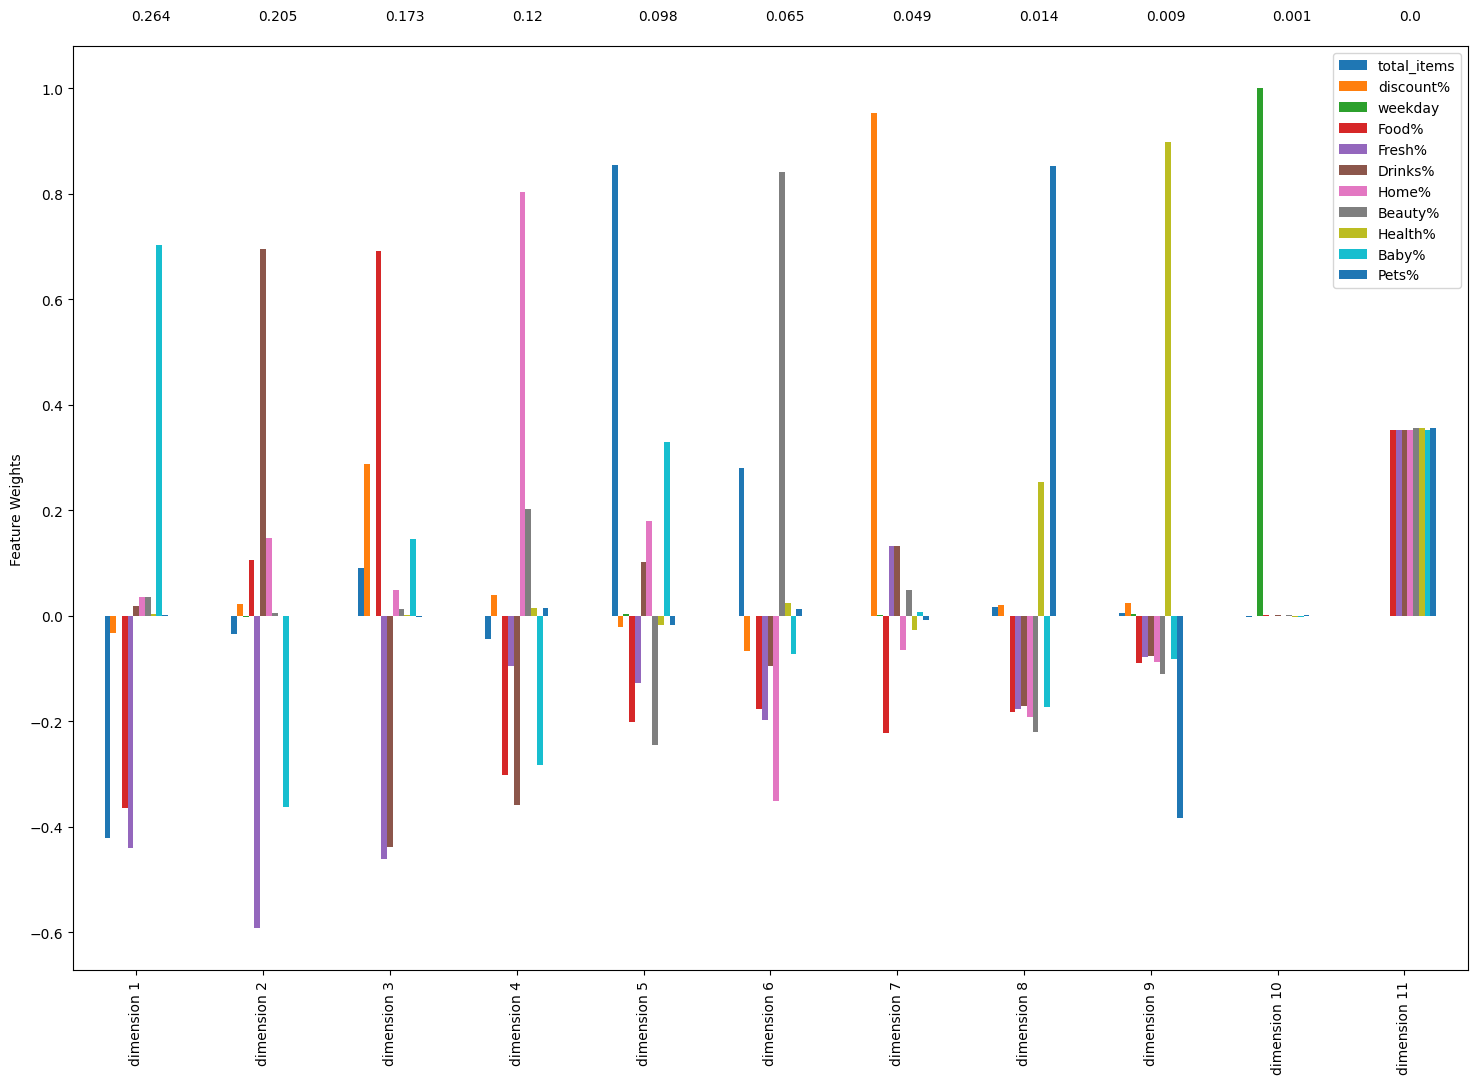

In [11]:
pca_results(pca, df)

This function accepts pca object and data frame as arguements and plot the scatter  plot of first four components

In [12]:
def pca_2d_plot(pca, df):
    fig = plt.figure(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,12)])
    sns.lmplot(x='dim1', y='dim2', data=data, height=12, fit_reg=False, scatter_kws={'s':8});
    sns.lmplot(x='dim3', y='dim4', data=data, height=12, fit_reg=False, scatter_kws={'s':8});
    plt.show()

<Figure size 1000x1000 with 0 Axes>

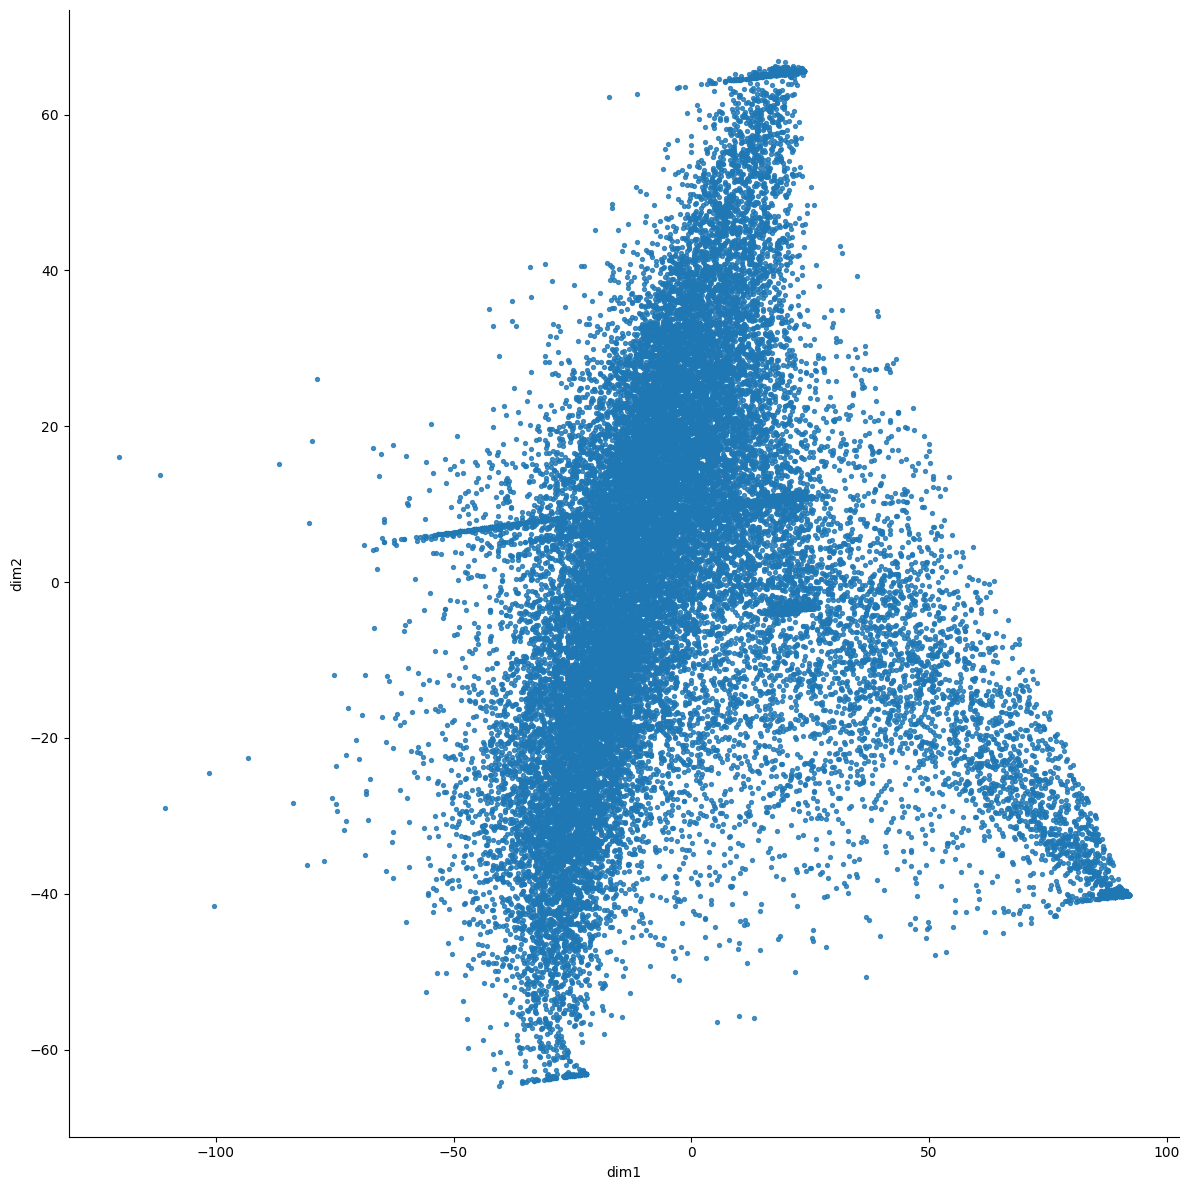

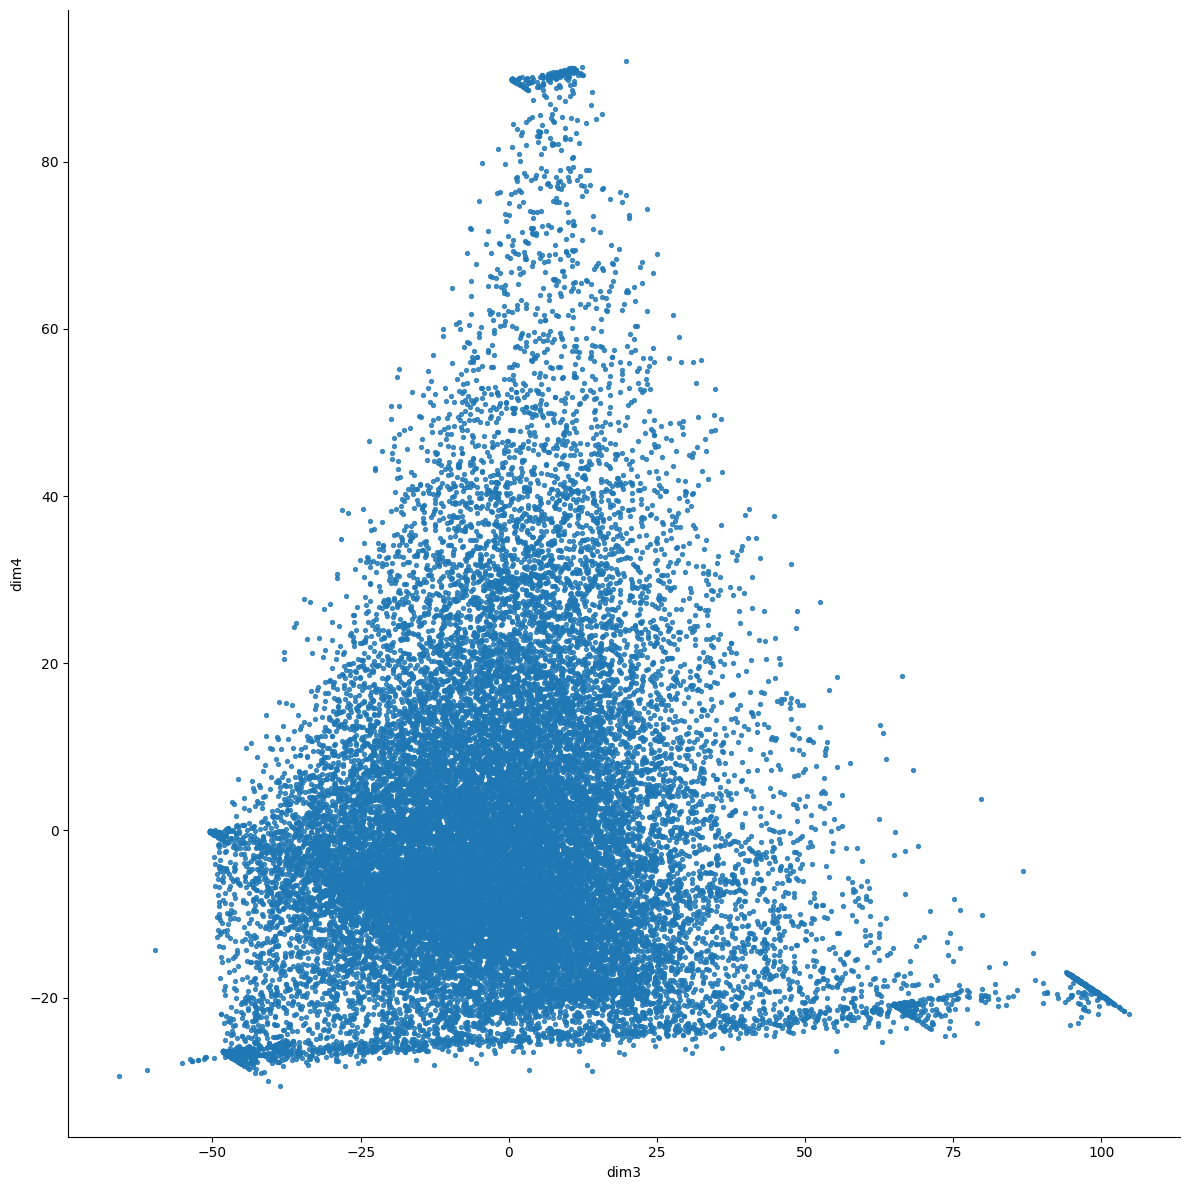

In [13]:
pca_2d_plot(pca, df)

Now let's plot the pairplots and see the variations and distributions of features with respect to each other

<Figure size 2000x2000 with 0 Axes>

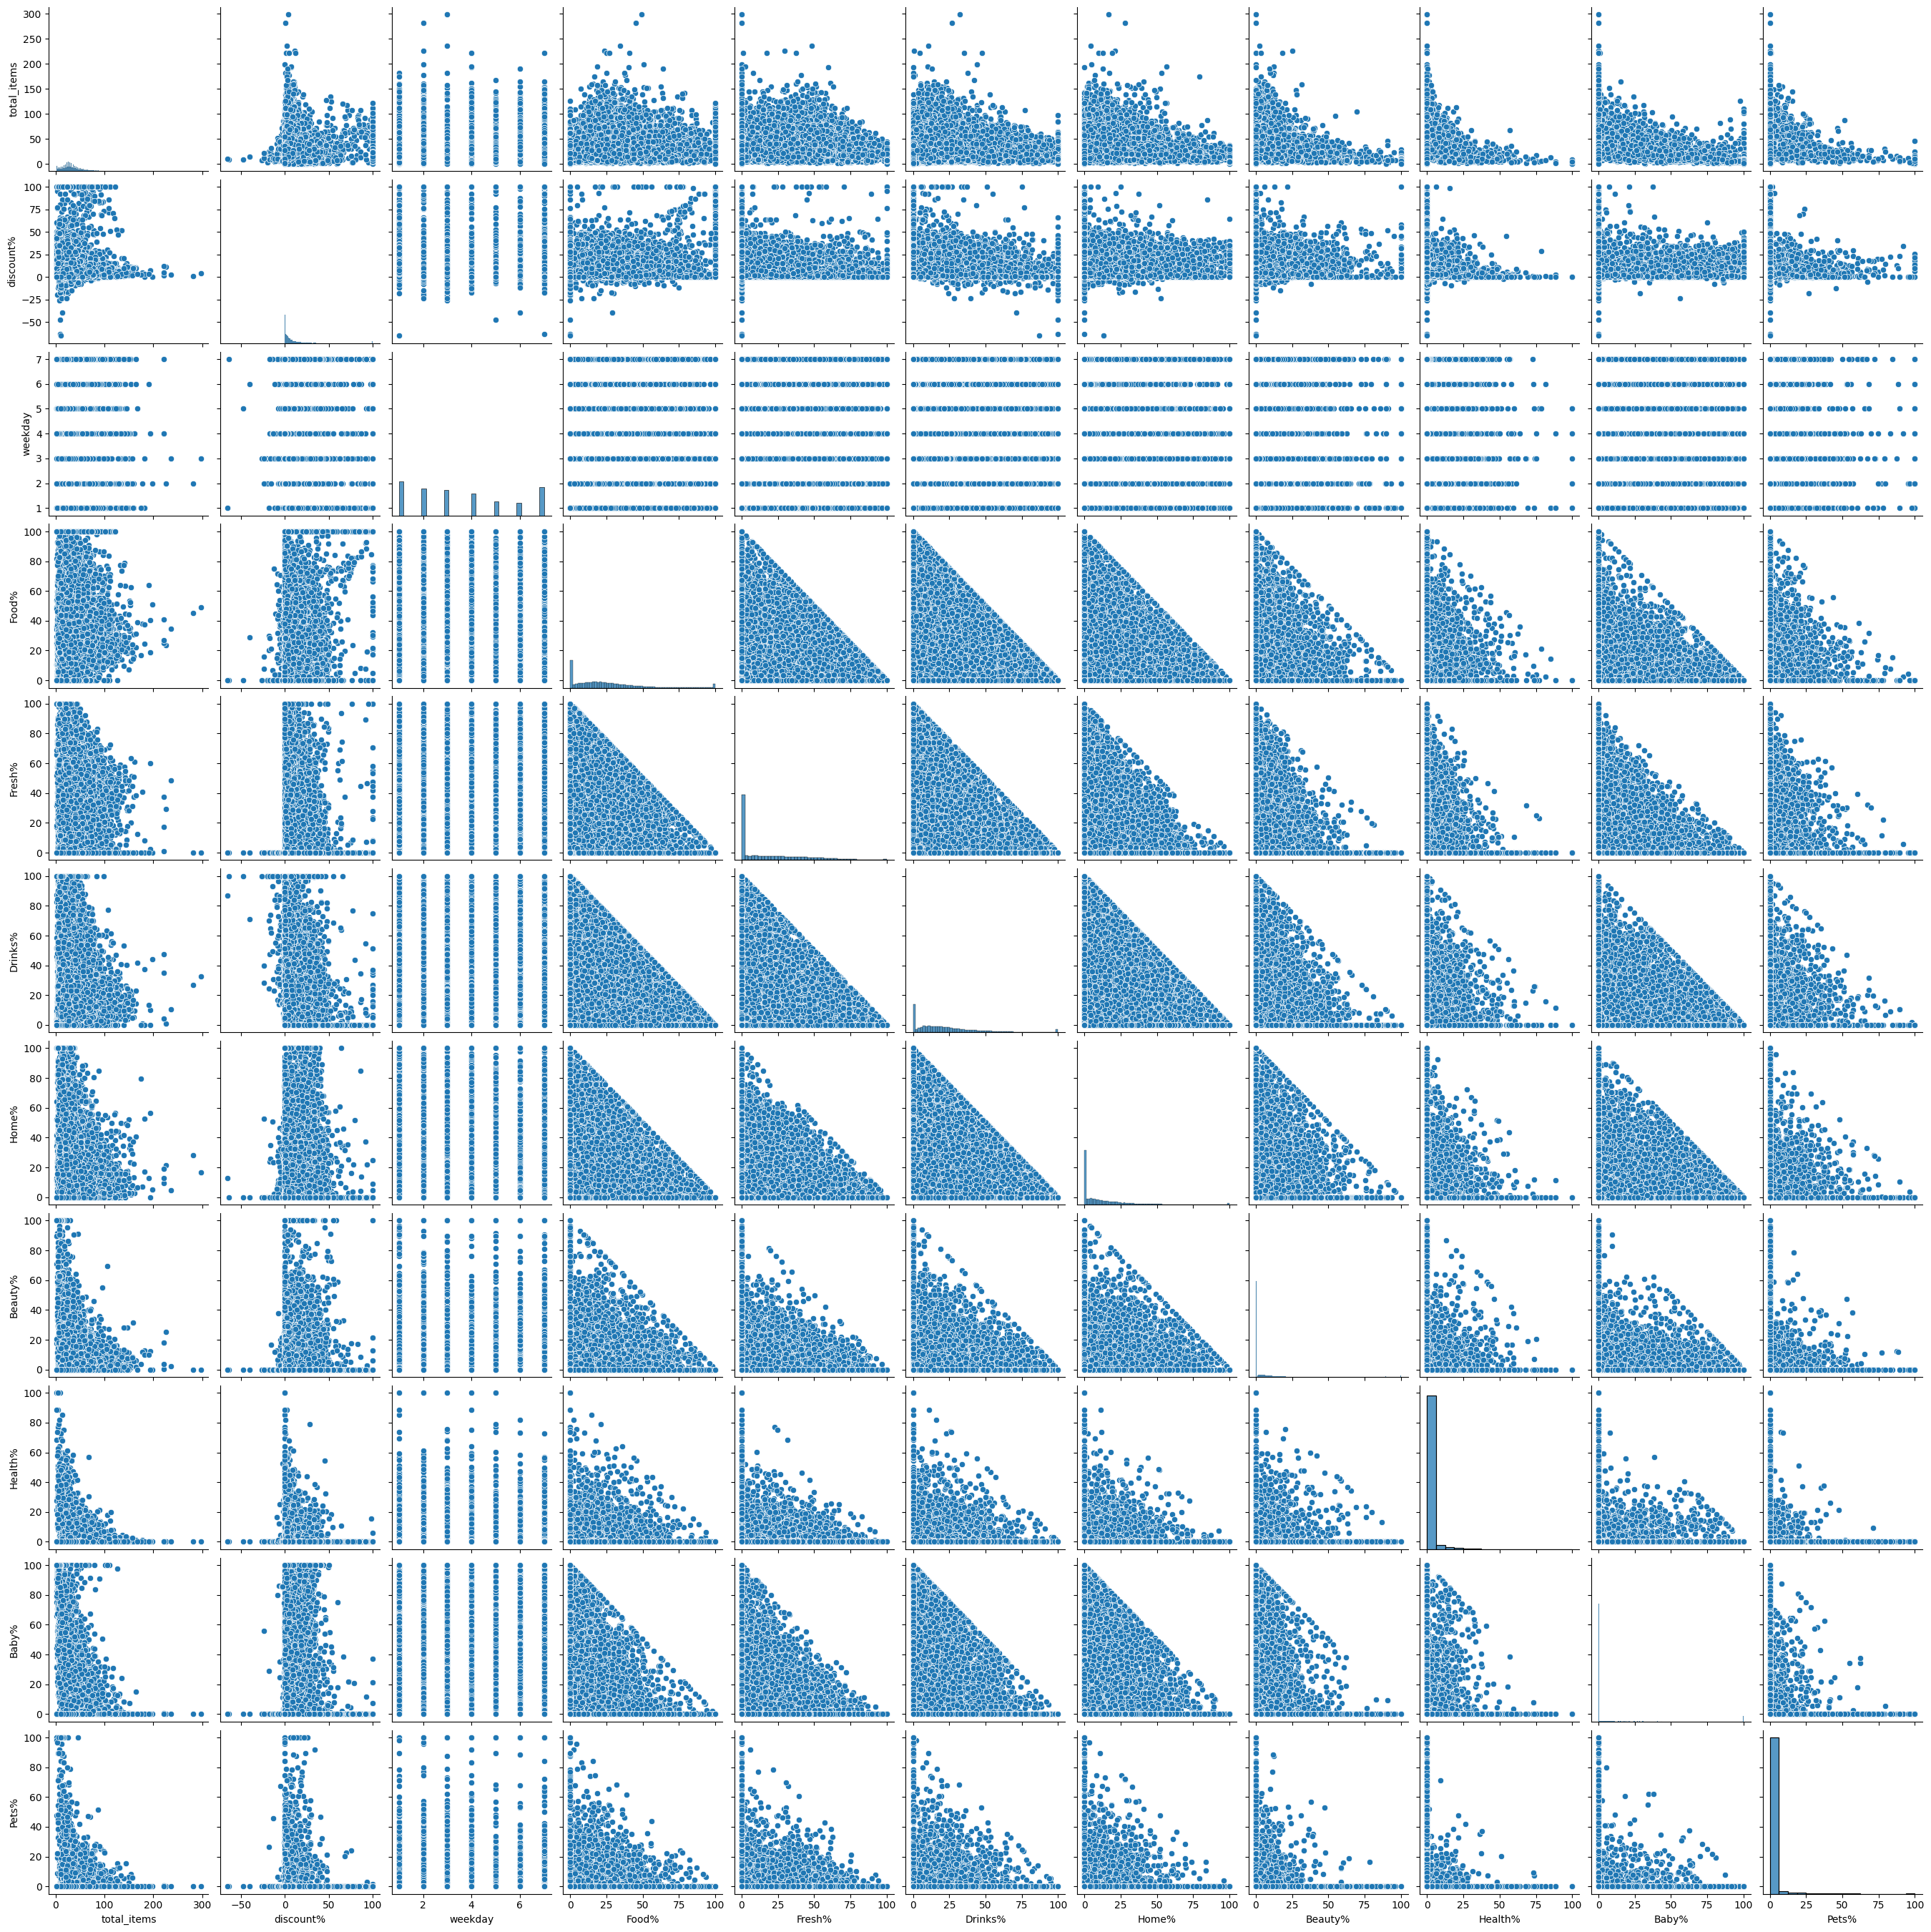

In [14]:
figure = plt.figure(figsize=(20, 20))
sns.pairplot(df)
plt.show()

1. total_items is skewed, applying a log transformation will help the clustering.
2. when discount% increases total_items increases which makes sense, people will buy more on discount.
3. below the 0 discount line only Drinks% has non zero percentage entries. Food%, Fresh% etc. have only zero percentage entries in negative discount area.
4. it makes sense that the plots in the right bottom are bound by the line x+y = 100, as the data is actually in percentage x+y <= 100.
5. the distribution plots are more and more skewed as we move towards the right bottom, as pet products, baby products and health products are brought by very less people.

4) Checking Dependent Variables

This function takes the data frame as argument and prints R2 score of model trained with each feature as target. This is a good method to identify the dependent variables from our dataset. This can be used in other contexts as well.

In [15]:
def dependent_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col,axis = 1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))
        

In [16]:
dependent_variable_detector(df)

Using total_items as dependent variable R2 score is :0.15848816407725974
Using discount% as dependent variable R2 score is :0.12779784963128127
Using weekday as dependent variable R2 score is :0.0019194529930831594
Using Food% as dependent variable R2 score is :0.9925724183188357
Using Fresh% as dependent variable R2 score is :0.9937312704627193
Using Drinks% as dependent variable R2 score is :0.9930865737794141
Using Home% as dependent variable R2 score is :0.9889948946530749
Using Beauty% as dependent variable R2 score is :0.9827301055344402
Using Health% as dependent variable R2 score is :0.888319659143346
Using Baby% as dependent variable R2 score is :0.994269557581205
Using Pets% as dependent variable R2 score is :0.9155244182728488


In [17]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize = (12,12))
    cax = ax.matshow(df_corr.values, interpolation = 'nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

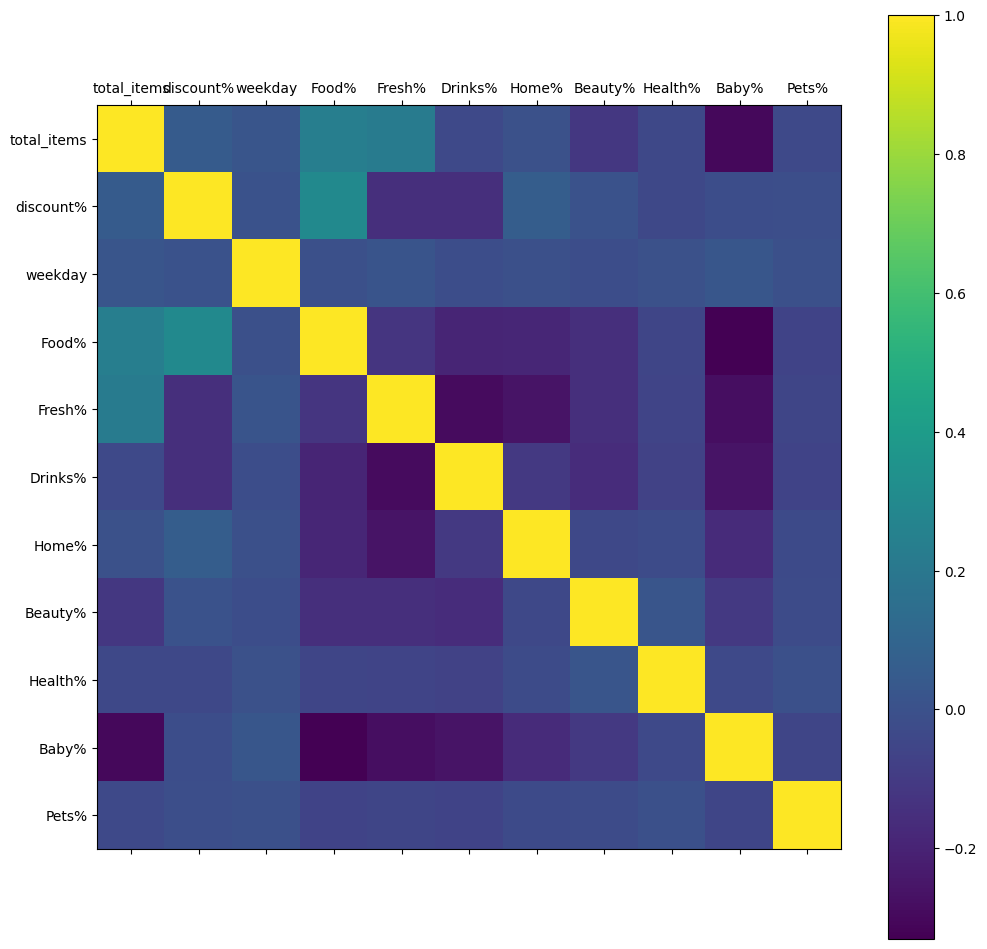

In [18]:
plot_corr_matrix(df)

1. The high R2 score in the case of Food%, Fresh% etc. does not mean they don't contain any information individually.
2. The high R2 score is owing to this relationship Food% + Fresh% + .......+ Pets% = 100, the regression model has learned it.

5. Outlier Detection

C:\Users\msaud\AppData\Local\Temp\ipykernel_4004\3889028992.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_items']);


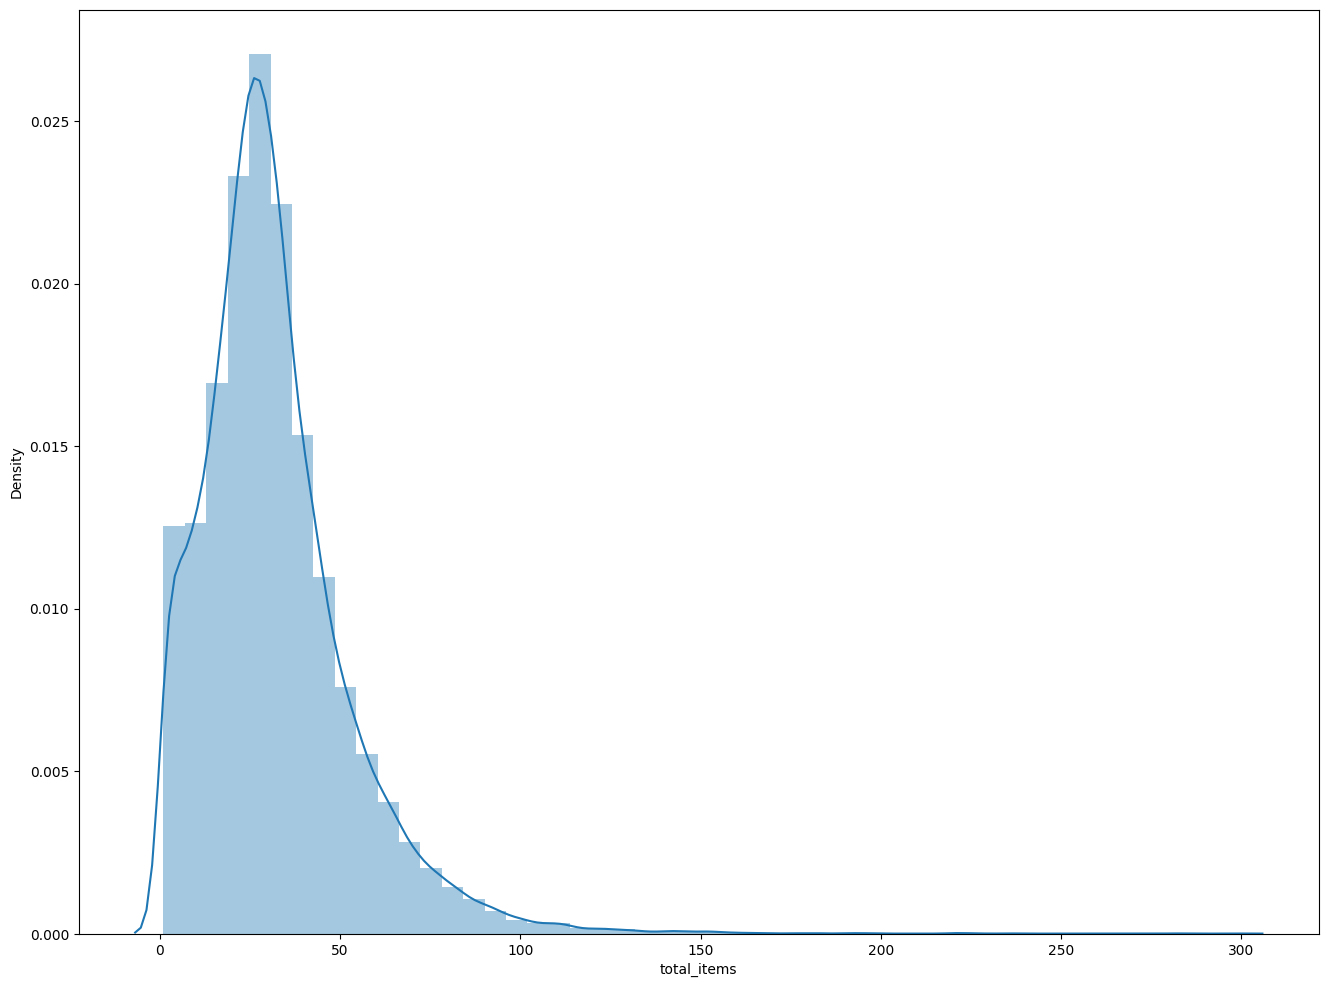

In [19]:
fig = plt.figure(figsize = (16, 12))
sns.distplot(df['total_items']);
plt.show()

This distribution is skews negatively, let's apply a log transformation.

C:\Users\msaud\AppData\Local\Temp\ipykernel_4004\1480340603.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_items']);


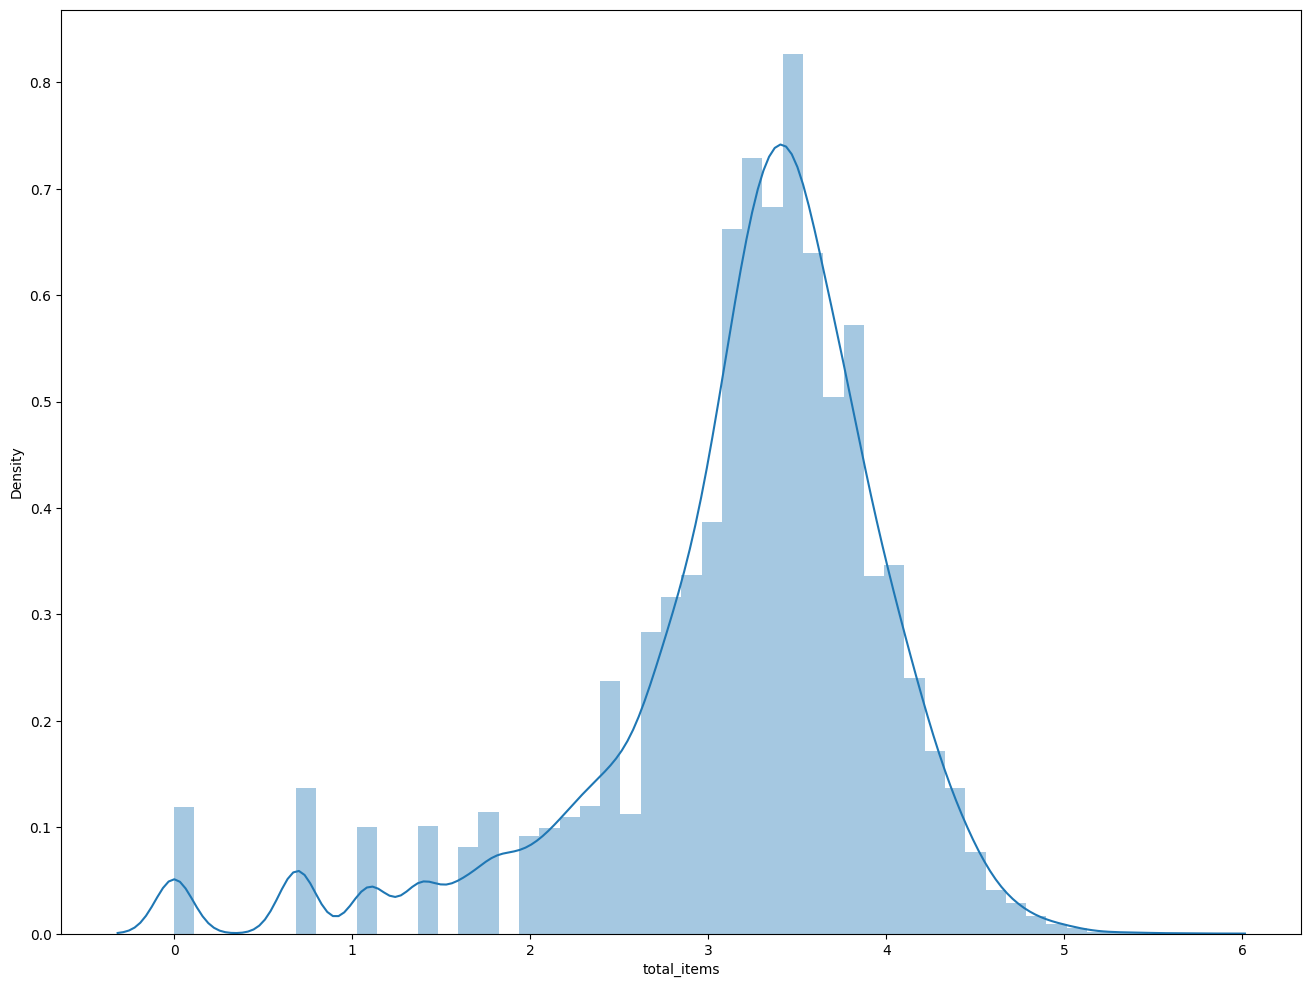

In [20]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize = (16, 12))
sns.distplot(df['total_items']);
plt.show()

Turkey Outlier Detection

1. According to Turkey method a point is an outlier if it lies 1.5 times inter quartile distance to the right of third quartile or if it lies 1.5 times inter quartile distance to the left of first quartile.
2. For more info refer: https://en.wikipedia.org/wiki/Outlier

This function takes df as an arguement and columns for which outlier detection has to be done, as an optional arguement. It returns a dictionary whose keys are column names and elements are indices of outlier points in the corresponding columns. It also prints the number of outliers in every column.

In [21]:
def tukey_outlier_detector(df,cols = None):
    if cols is None:
        cols = [str(s) for s in df.describe().columns]
        
        q1 = {}
        q3 = {}
        iqd = {}
        r_limit = {}
        l_limit = {}
        outlier_count = {}
        outlier_indices = {}
        for col in cols:
            q1[col] = np.percentile(df[col].values, 25)
            q3[col] = np.percentile(df[col].values, 75)
            iqd[col] = q3[col] - q1[col]
            r_limit[col] = q3[col] + 1.5*iqd[col]
            l_limit[col] = q1[col] - 1.5*iqd[col]
            data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
            outlier_count[col] = data_outlier.shape[0]
            outlier_indices[col] = data_outlier.index


    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices            

In [22]:
outlier_indices = tukey_outlier_detector(df)

_________________________
total_items-------->1899
_________________________
discount%-------->2337
_________________________
weekday-------->0
_________________________
Food%-------->1221
_________________________
Fresh%-------->254
_________________________
Drinks%-------->1386
_________________________
Home%-------->1432
_________________________
Beauty%-------->2901
_________________________
Health%-------->30000
_________________________
Baby%-------->6403
_________________________
Pets%-------->30000


1. The outliers in Health% and Pets% are due to the fact that, lot people don't buy these products and the entries are mostly 0.
2. The outliers in Food%, Fresh% etc. are due to the 0% and 100% entries which is a completely natural phenomenon in this scenario.
3. The outliers in discount% is also due to 0% and 100% entries.
4. For these features let's acknowledge the fact that there are outliers and leave it there.
5. Let's remove the outliers in total_items.

In [23]:
df.drop(outlier_indices['total_items'], inplace = True)


In [24]:
frame.drop(outlier_indices['total_items'], inplace = True)

6. Are there clusters in the data, how many clusters?

Elbow method

1. The first method we are going to try is the elbow method.
2. In this method we plot the sum of distances of all the data points to the corresponding cluster centroids vs number of clusters, for a range of number of clusters.
3. If there is a elbow in the plot the point at which elbow occurred is the number of clusters present in the data.
4. We are lucky if we see an elbow in the plot, but in most cases the plot will just be smooth revealing no information about the number of clusters.

In [25]:
from sklearn.cluster import KMeans

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X = scaler.fit_transform(df.values)

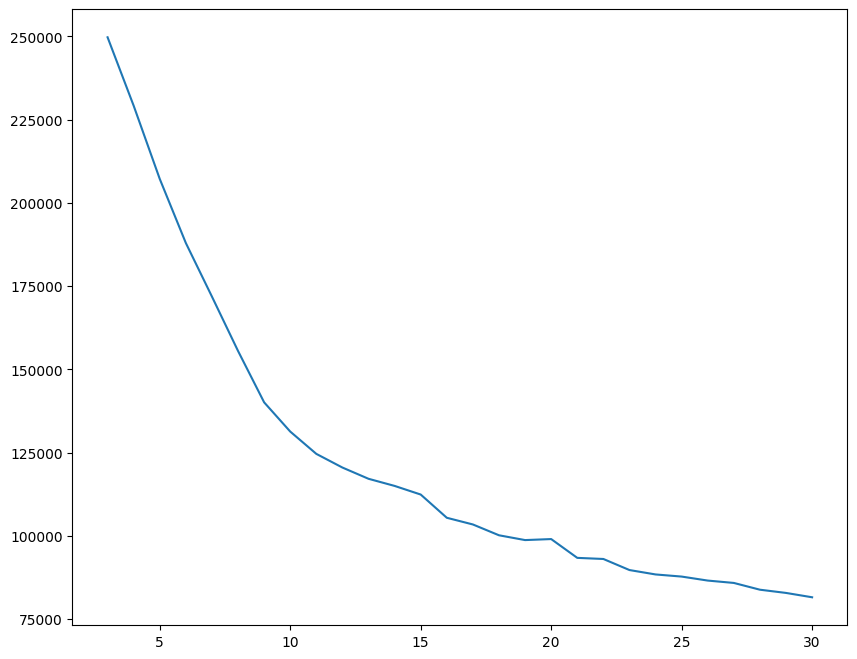

In [28]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(clusters, inertia);
plt.show()

There are somewhere around 10 clusters in the data.

Hopkins Statistics

1. For every data point in the given data, calculate nearest neighbor distance and take it's sum. Let this be s.
2. Generate random data in the same shape as the given data.
3. For the random data calculate the nearest neighbor distance and take it's sum. Let this be r.
4. Hopkins statistic score = s/(s+r).
5. The intuition is, if the sample data has clusters in it, the nearest-neighbor-distance-sum of sample will be very much smaller than that of random data.
6. A very small Hopkins statistic score means the data has very good clusters.

In [29]:
def hopkins_statistics(df):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    n_samples = df.shape[0]
    num_samples = [int(f*n_samples) for f in [0.25, 0.5, 0.75]]
    states = [123, 42, 67, 248, 654]
    for n in num_samples:
        print('-'*12+str(n)+'-'*12)
        hopkins_statistic = []
        for random_state in states:
            data = df.sample(n=n, random_state = random_state)
            nbrs = NearestNeighbors(n_neighbors = 2)
            scaler = StandardScaler()
            X = scaler.fit_transform(data.values)
            nbrs.fit(X)
            sample_dist = nbrs.kneighbors(X)[0][:,1]
            sample_dist = np.sum(sample_dist)
            random_data = np.random.rand(X.shape[0], X.shape[1])
            nbrs.fit(random_data)
            random_dist = nbrs.kneighbors(random_data)[0][:,1]
            random_dist = np.sum(random_dist)
            hs = sample_dist/(sample_dist + random_dist)
            hopkins_statistic.append(hs)
            print('*'*25)
            print('hopkins statistic : '+str(hs))
        print('mean hopkins statictic : '+str(np.mean(np.array(hopkins_statistic))))
        print('hopkins statistic standard deviation :'+str(np.std(np.array(hopkins_statistic))))

In [30]:
hopkins_statistics(df)

------------7025------------
*************************
hopkins statistic : 0.6201300028970556
*************************
hopkins statistic : 0.6188735745709745
*************************
hopkins statistic : 0.6196704848739912
*************************
hopkins statistic : 0.6194481057472877
*************************
hopkins statistic : 0.6169832731302971
mean hopkins statictic : 0.6190210882439212
hopkins statistic standard deviation :0.0010961936289073004
------------14050------------
*************************
hopkins statistic : 0.6073767668515349
*************************
hopkins statistic : 0.608679244583304
*************************
hopkins statistic : 0.6082561481755764
*************************
hopkins statistic : 0.6070714395356556
*************************
hopkins statistic : 0.6075321140115875
mean hopkins statictic : 0.6077831426315317
hopkins statistic standard deviation :0.0005935336371168867
------------21075------------
*************************
hopkins statistic : 0.602106

We take different number of samples from the data and generate random data with different seeds and calculate hopkins statistic for each. The Hopkins statistics score is bad. Let's proceed with the analysis.

Kth Nearest Data Point

1. Calculate the sum of distances of kth nearest neighbor of all the data points in the given data.
2. Plot the value of the sum against k.
3. If there is a sharp decline in the rate of change of y at some value of k, then there are clusters in the data.

In [31]:
def kth_nearest_data_point(df, k_max):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    ks = range(1,k_max+1)
    scaler = StandardScaler()
    X = scaler.fit_transform(df.values)
    nbrs = NearestNeighbors(n_neighbors=k_max)
    nbrs.fit(X)
    kneighbors_result = nbrs.kneighbors()[0]
    kth_neighbor_dist = list(np.sum(kneighbors_result, axis=0))
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, kth_neighbor_dist);
    plt.show()

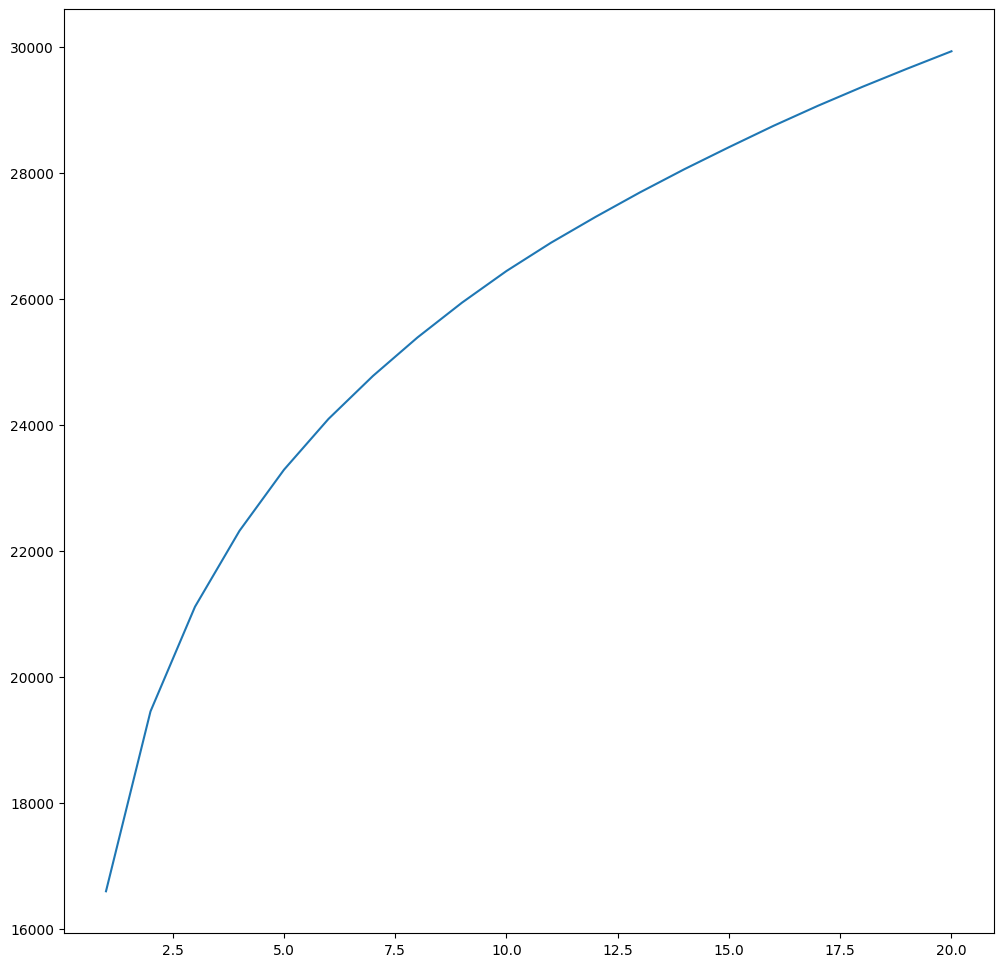

In [32]:
kth_nearest_data_point(df, 20)

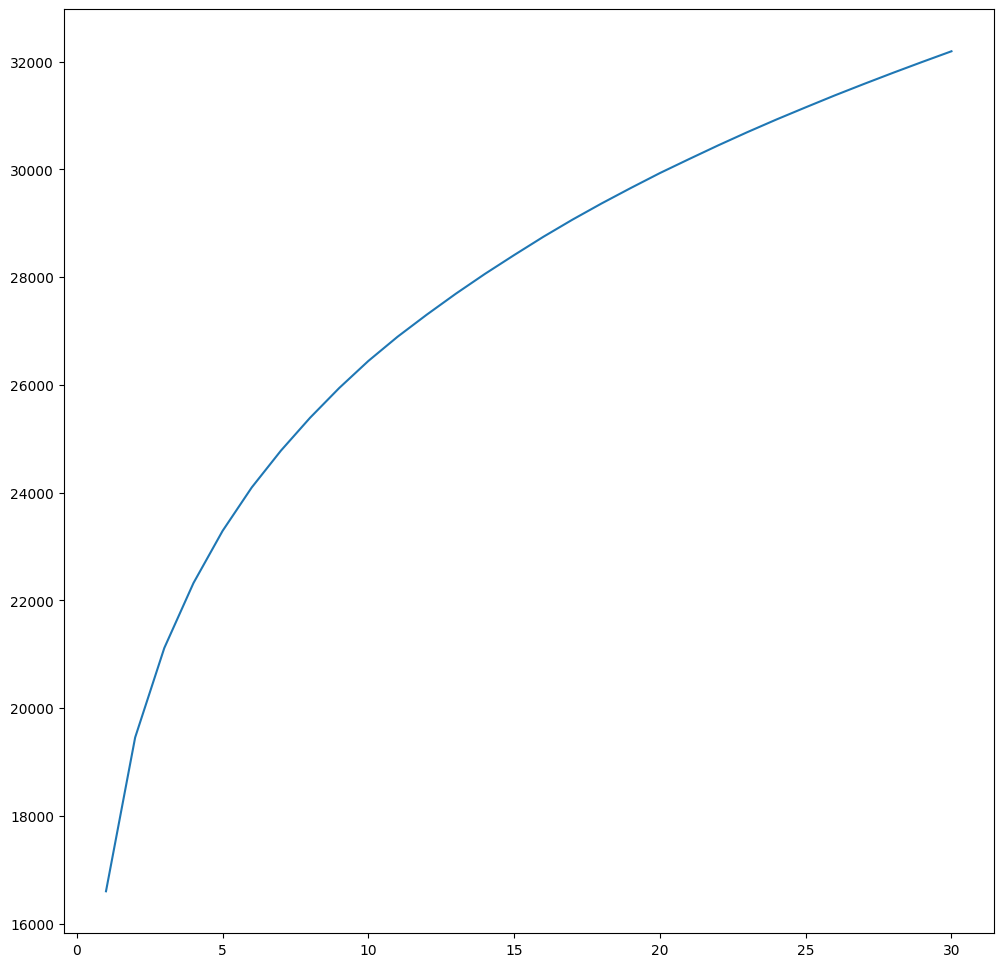

In [33]:
kth_nearest_data_point(df,30)

Silhoutte Score

1. a(i) is the sum of the sum of distances of the ith data point to the other data points in it's cluster.
2. Calculate the sum of distance of ith data point to the points in every other cluster.
3. b(i) is the sum of distances from ith data point to all points in a cluster, for which sum of distances is munimum.
4. silhoutte score, s(i) = 1-a(i)/b(i)
5. If a data point is more similar to it's own cluster and very much different from other clusters, then a(i)<<b(i), greater will be the silhoutte score.
6. The silhoutte score we plot is the average of it over all the data points.

In [34]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

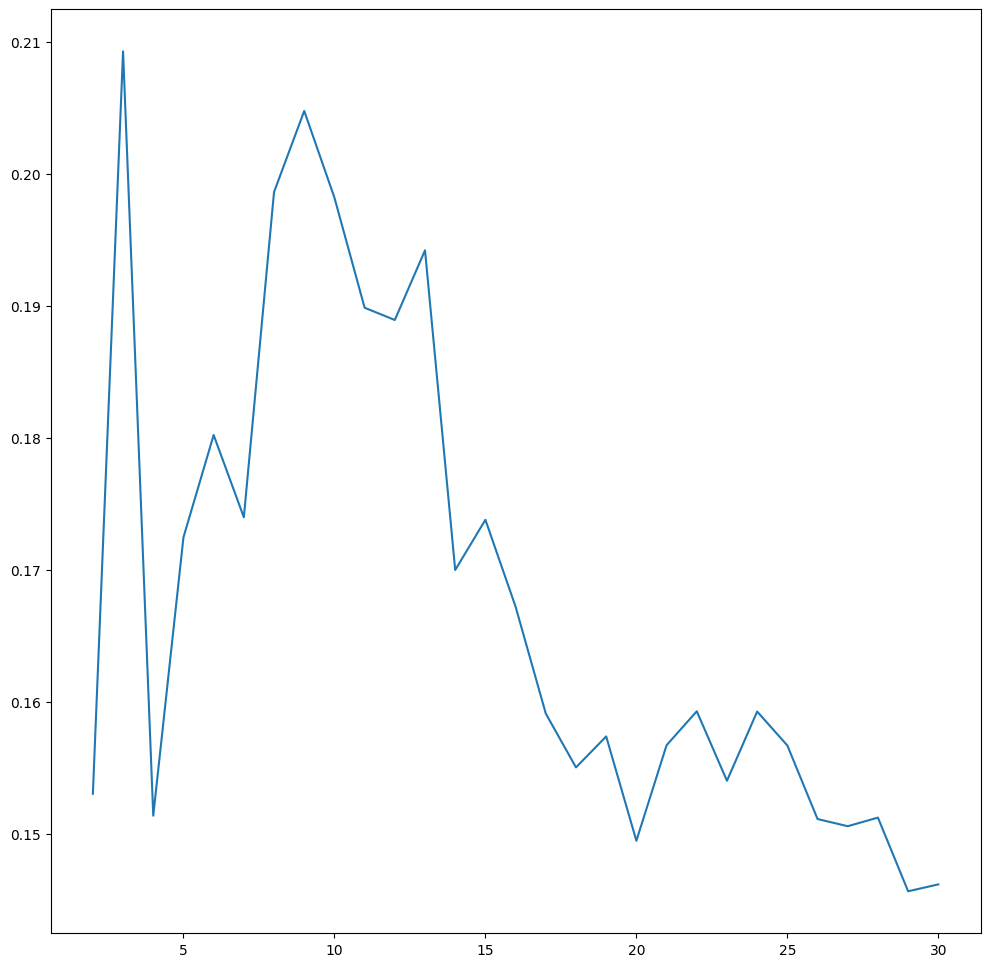

In [35]:
plot_silhoutte_score(X,30)

We plot number of clusters vs silhoutte score, the silhoutte score hits it's maximum at around 10 clusters.

Soft Clustering


1. In soft clustering every point is a part of every cluster with a certain probability.
2. Gaussian Mixture Model is a soft clustering algorithm which uses Estimation Maximization algorithm to learn the parameters.
3. The following function finds the best covariance type and number of components based on bayesian information criterion.

In [36]:
def ncomponents_of_gmm(X, min_components, max_components):
    from sklearn.mixture import GaussianMixture
    import itertools
    from scipy import linalg
    import matplotlib as mpl
    min_bic = np.inf
    bic = []
    n_components_range = range(min_components, max_components+1)
    cv_types = ['spherical','tied','diag','full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < min_bic:
                min_bic = bic[-1]
                best_gmm = gmm
        
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
    clf = best_gmm
    bars = []
    
    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
            (i + 1) * len(n_components_range)],width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)
        
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    return best_gmm

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

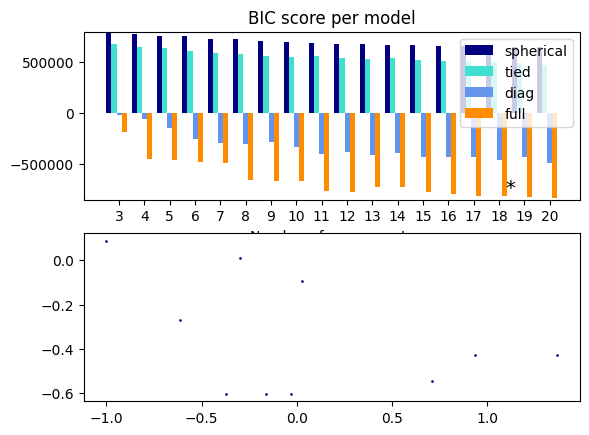

In [37]:
gmm = ncomponents_of_gmm(X, 3, 20)

Validity Index

1. When the number of clusters is less than the correct number of clusters then the data is under partitioned, if the number of clusters is more than the correct number of clusters then the data is over partitioned.
2. Sum of distances from the data points to the corresponding cluster centers is a measure of under partition.
3. Number of clusters divided by minimum distance between two clusters is a measure of over partition, it increases when the data is more over partitioned.
3. A normalized sum of these two can help finding the actual number of clusters.

In [ ]:
def under_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    ks = range(1,k_max+1)
    UPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        UPM.append(kmeans.inertia_)
    fig, ax = plt.subplots(figsize=(14,14))
    ax.plot(ks, UPM);
    plt.show()
    return UPM

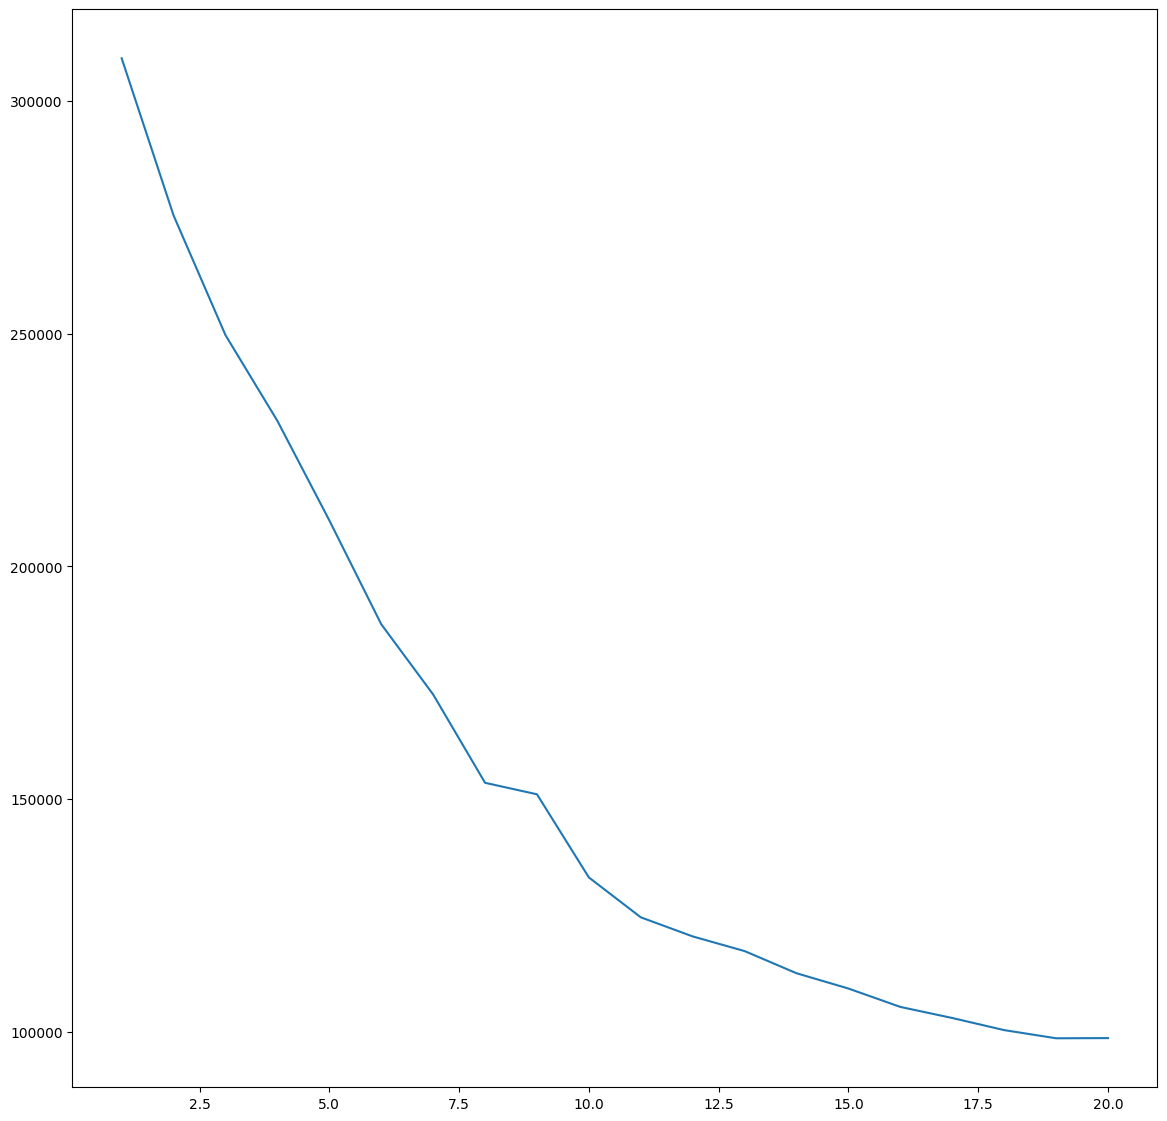

In [ ]:
_ = under_partition_measure(X, 20)

This is same as the elbow we saw before.

In [ ]:
def over_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import pairwise_distances
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    
    ks = range(1, k_max + 1)
    OPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        d_min = np.inf
        for pair in list(itertools.combinations(centers, 2)):
            # Extract the distance value with [0][0]
            d = pairwise_distances(pair[0].reshape(1, -1), pair[1].reshape(1, -1), metric='euclidean')[0][0]
            if d < d_min:
                d_min = d
        OPM.append(k / d_min)

    # Plotting the results
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.plot(ks, OPM)
    plt.show()
    
    return OPM


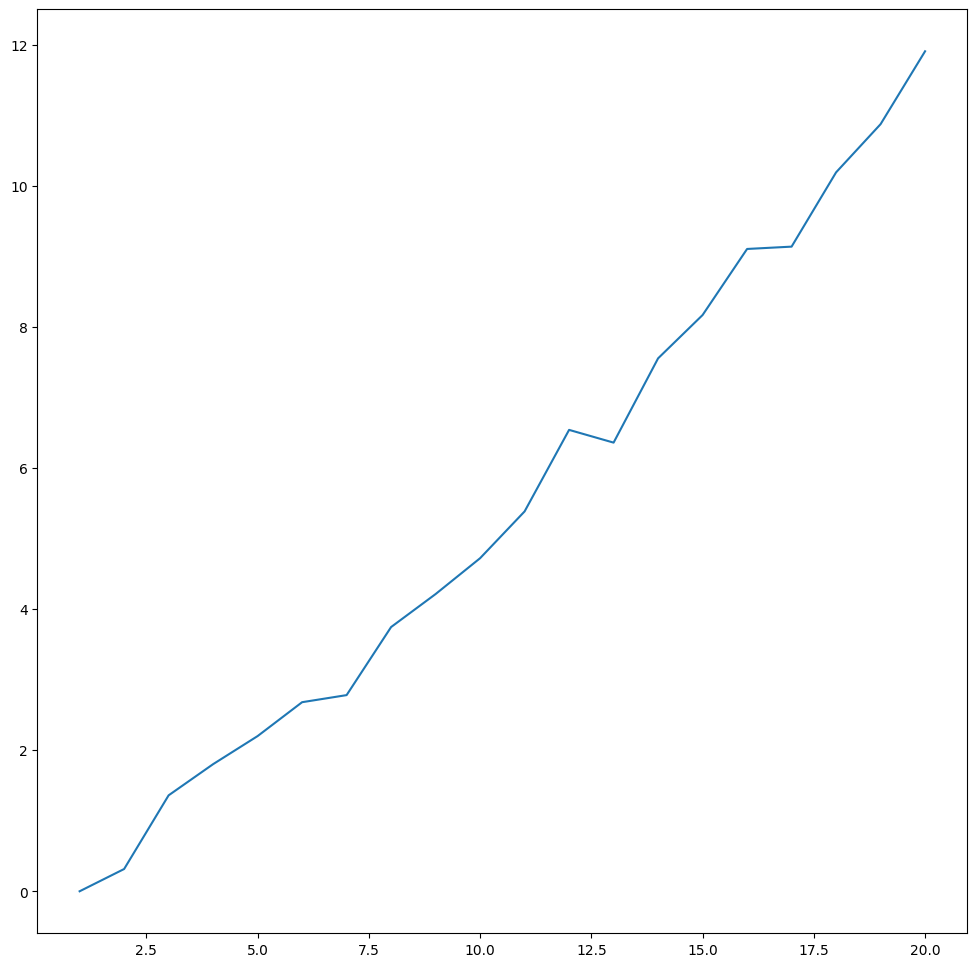

In [ ]:
_ = over_partition_measure(X, 20)

In [ ]:
def validity_index(X, k_max):
    UPM = under_partition_measure(X, k_max)
    OPM = over_partition_measure(X, k_max)
    UPM_min = np.min(UPM)
    OPM_min = np.min(OPM)
    UPM_max = np.max(UPM)
    OPM_max = np.max(OPM)
    norm_UPM = []
    norm_OPM = []
    for i in range(k_max):
        norm_UPM.append((UPM[i]-UPM_min)/(UPM_max-UPM_min))
        norm_OPM.append((OPM[i]-OPM_min)/(OPM_max-OPM_min))
        
    validity_index = np.array(norm_UPM)+np.array(norm_OPM)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(range(1,k_max+1), validity_index)
    return validity_index

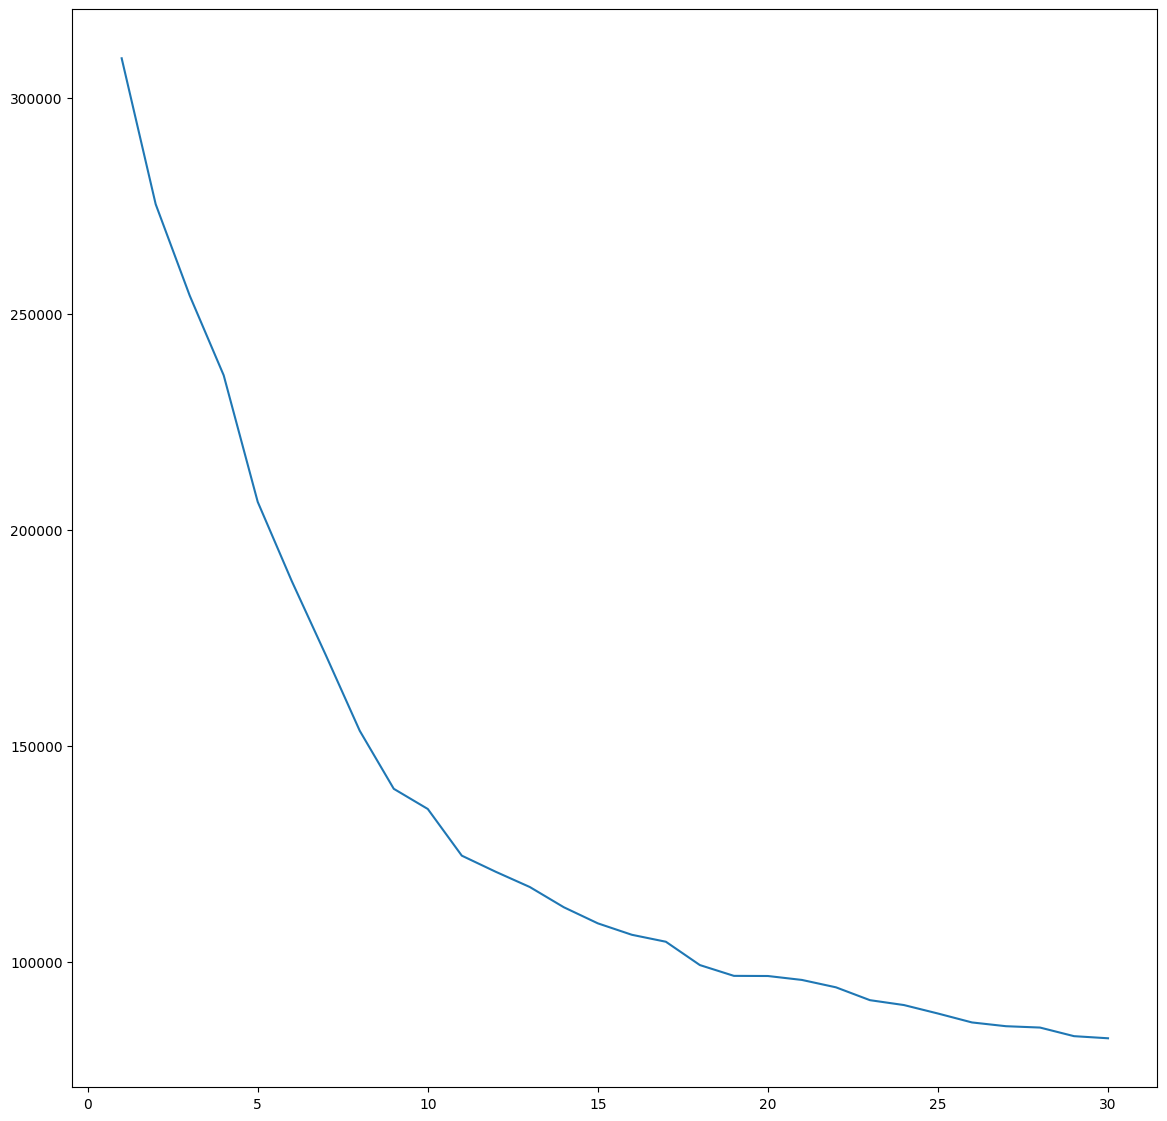

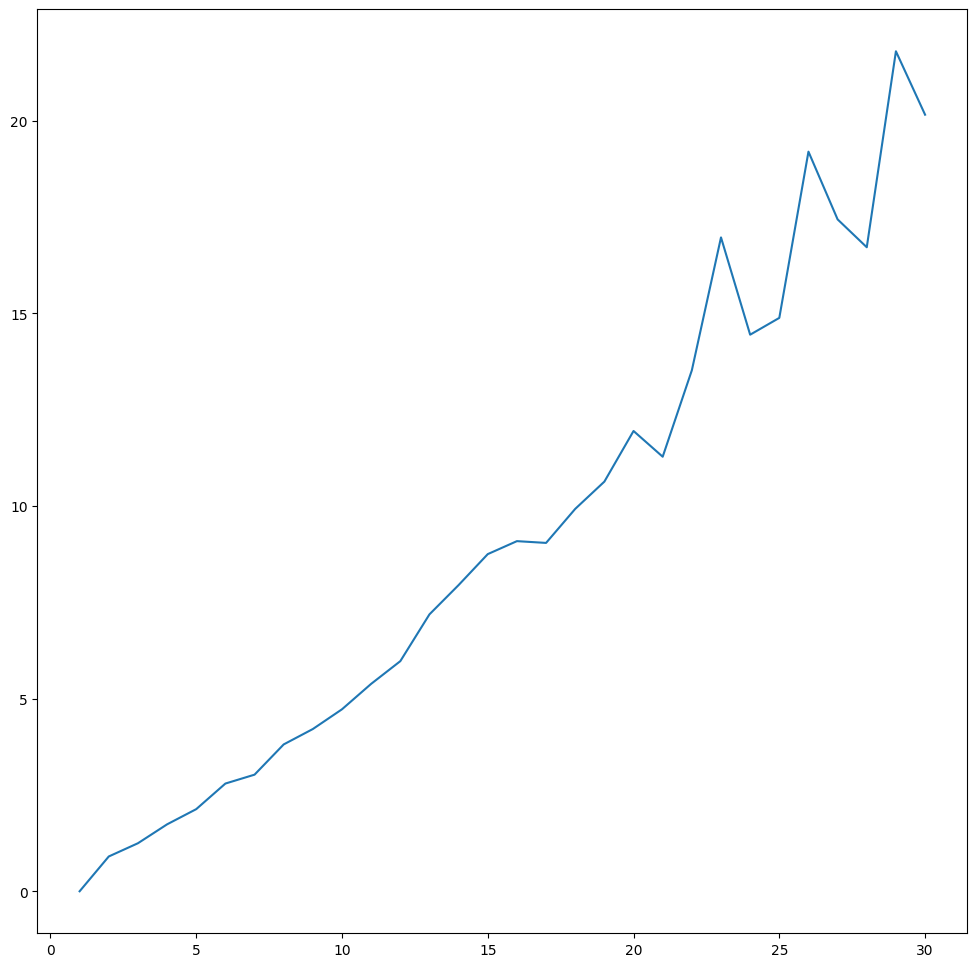

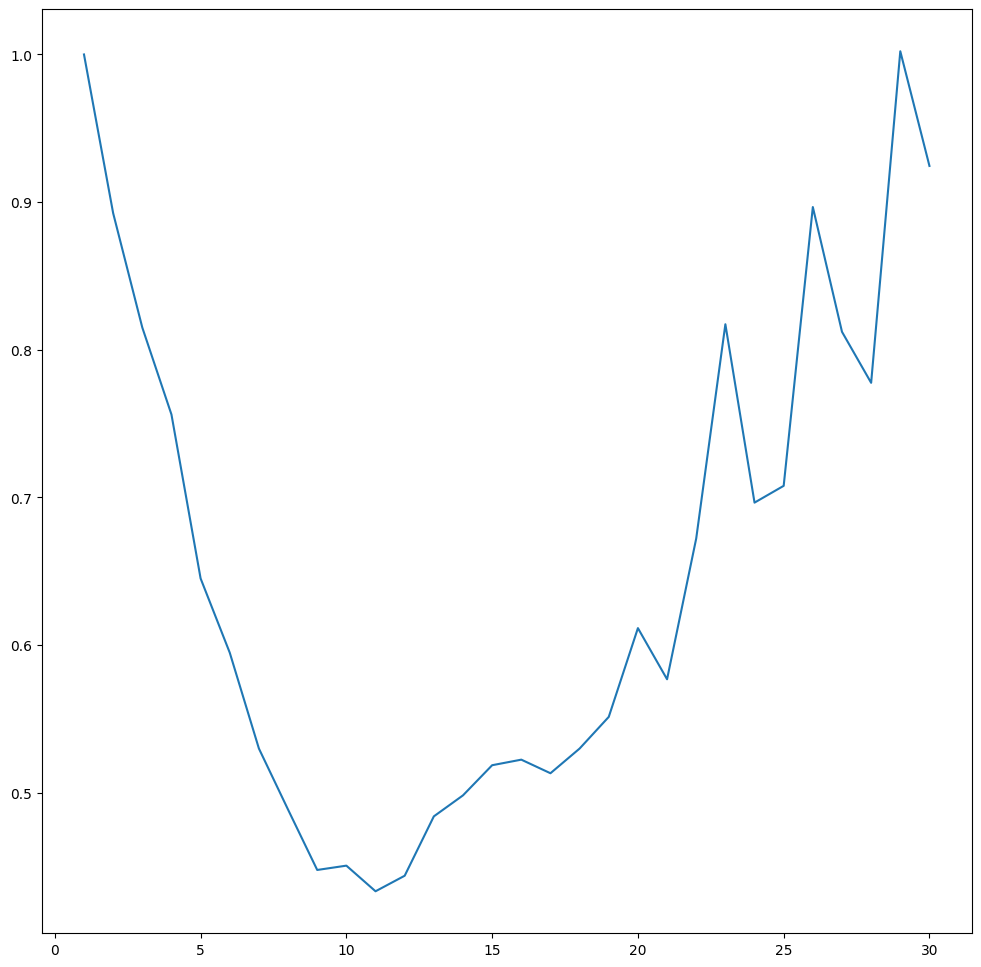

In [ ]:
_ = validity_index(X, 30)

This again gives us a surety that, there are around 10 clusters.

All our analysis so far suggests there could be around 10 clusters in the data, let's now manually examine and try to interpret the meaning of these clusters.

Clustering and Interpretation

In [ ]:
k = 10
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)

In [ ]:
frame[frame['labels']==0]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0             0      0           45      23.03        4    13   9.46   87.06   
1             0      1           38       1.22        5    13  15.87   75.80   
2             0      2           51      18.08        4    13  16.88   56.75   
4             1      4           53      18.31        2    11  24.13   60.38   
5             1      5            8      23.89        4    13   0.00  100.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29968     10220  29968           19       2.01        2     8  20.54   52.23   
29973     10222  29973           20       3.95        1     8  17.51   59.08   
29975     10224  29975           27       0.00        4    12  38.09   56.94   
29980     10228  29980           31      32.89        1    23  24.12   34.54   
29981     10228  29981           27      27.91        2    12  19.43   53.57   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  
0         3.48   0.00     0.00     0.00   0.00   0.00       0  
1         6.22   2.12     0.00     0.00   0.00   0.00       0  
2         3.37  16.48     6.53     0.00   0.00   0.00       0  
4         7.78   7.72     0.00     0.00   0.00   0.00       0  
5         0.00   0.00     0.00     0.00   0.00   0.00       0  
...        ...    ...      ...      ...    ...    ...     ...  
29968     0.00   0.00     0.00     0.00  27.23   0.00       0  
29973     6.71   0.00    10.39     0.00   0.00   6.31       0  
29975     4.96   0.00     0.00     0.00   0.00   0.00       0  
29980    26.02   7.38     7.94     0.00   0.00   0.00       0  
29981     2.80   7.98     3.57    12.66   0.00   0.00       0  

[6096 rows x 15 columns]

In [ ]:
frame[frame['labels']==0].describe()

customer         order  total_items    discount%      weekday  \
count   6096.000000   6096.000000  6096.000000  6096.000000  6096.000000   
mean    5397.887467  16161.947507    38.225558     5.268983     2.890256   
std     2785.899432   8376.962075    18.484114     6.663868     1.680540   
min        0.000000      0.000000     6.000000     0.000000     1.000000   
25%     3396.000000   9755.500000    26.000000     1.000000     1.000000   
50%     5670.000000  16860.000000    34.000000     3.030000     3.000000   
75%     7776.000000  23483.250000    46.000000     6.870000     4.000000   
max    10228.000000  29981.000000   139.000000    65.100000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  6096.000000  6096.000000  6096.000000  6096.000000  6096.000000   
mean     15.008858    18.570340    55.503990    13.564603     6.431010   
std       5.882128    10.748123    16.017717    10.522793     7.639244   
min       0.000000     0.000000    19.810000     0.000000     0.000000   
25%      11.000000    10.690000    43.250000     5.640000     0.000000   
50%      15.000000    17.755000    53.480000    11.845000     3.810000   
75%      20.000000    25.700000    66.112500    19.690000    10.237500   
max      23.000000    55.570000   100.000000    53.780000    44.100000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  6096.000000  6096.000000  6096.000000  6096.000000  6096.0  
mean      2.671791     0.482981     2.203107     0.505138     0.0  
std       4.563454     1.972055     6.540431     2.289441     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.0  
25%       0.000000     0.000000     0.000000     0.000000     0.0  
50%       0.000000     0.000000     0.000000     0.000000     0.0  
75%       3.980000     0.000000     0.000000     0.000000     0.0  
max      26.250000    17.030000    48.620000    22.680000     0.0

1. These class of people seem to order beauty products a lot.
2. They must be beauty conscious people, let's call them beauty conscious.

In [ ]:
frame.loc[frame['labels']==0, 'class'] = 'beauty_concious'

In [ ]:
frame[frame['labels']==1]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
107           9    107           29       8.02        7    10  25.62   19.48   
111          10    111           23      15.94        1    19   9.37    0.00   
112          10    112           26       6.93        3    22   4.93    0.00   
152          22    152           31       5.19        7    16   9.96   13.96   
158          25    158           23       1.30        2    19   1.74   18.27   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29894     10192  29894           25      36.56        6    11   5.24    0.00   
29900     10195  29900            6      25.00        2    13   0.00    0.00   
29920     10200  29920            7       1.74        5    11   0.00    0.00   
29936     10205  29936           22      13.43        3    20  12.04    0.00   
29979     10227  29979           37      15.57        1    13   0.00    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
107      17.34   8.28    29.27     0.00   0.00    0.0       1   nan  
111       0.00  42.45    48.18     0.00   0.00    0.0       1   nan  
112       0.00  34.17    54.72     6.17   0.00    0.0       1   nan  
152      21.65  21.51    27.56     0.00   5.35    0.0       1   nan  
158      21.33  25.14    24.13     9.39   0.00    0.0       1   nan  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29894    14.56  45.24    31.06     0.00   0.00    3.9       1   nan  
29900     0.00   0.00   100.00     0.00   0.00    0.0       1   nan  
29920    13.79  23.37    62.84     0.00   0.00    0.0       1   nan  
29936    47.67   0.00    40.28     0.00   0.00    0.0       1   nan  
29979     0.00   0.00    90.67     0.00   9.33    0.0       1   nan  

[1108 rows x 16 columns]

In [ ]:
frame[frame['labels']==1].describe()

customer         order  total_items    discount%      weekday  \
count   1108.000000   1108.000000  1108.000000  1108.000000  1108.000000   
mean    4427.730144  13240.225632    25.477437    11.584558     3.754513   
std     3016.622779   9007.057020    13.758874    11.980588     2.136538   
min        9.000000    107.000000     6.000000    -7.810000     1.000000   
25%     1685.000000   5036.750000    16.000000     2.687500     2.000000   
50%     3972.000000  11765.500000    24.000000     7.850000     3.000000   
75%     7002.000000  20952.250000    31.000000    16.090000     6.000000   
max    10227.000000  29979.000000   139.000000    61.860000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  1108.000000  1108.000000  1108.000000  1108.000000  1108.000000   
mean     14.935018    15.980605     8.531868    15.406020    13.926552   
std       5.826870    13.874165    12.985191    14.538892    14.420034   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000     3.707500     0.000000     0.000000     0.000000   
50%      15.000000    14.275000     0.000000    12.435000     9.840000   
75%      20.000000    24.660000    14.837500    24.092500    24.075000   
max      23.000000    73.090000    68.770000    69.630000    65.060000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  1108.000000  1108.000000  1108.000000  1108.000000  1108.0  
mean     40.822347     0.854946     3.850551     0.372148     1.0  
std      19.317798     3.182361    10.369693     2.271797     0.0  
min      19.230000     0.000000     0.000000     0.000000     1.0  
25%      28.077500     0.000000     0.000000     0.000000     1.0  
50%      33.350000     0.000000     0.000000     0.000000     1.0  
75%      46.257500     0.000000     0.000000     0.000000     1.0  
max     100.000000    24.790000    63.450000    24.090000     1.0

1. These are the class of people who have ordered drinks a lot.
2. These people had to face a lot of extra charges for drink purchases.
3. They are potential customers, as we all know drinks can be addictive atleast in a teeny tiny level.

In [ ]:

frame.loc[frame['labels']==1, 'class'] = 'drink_buyers'

In [ ]:
frame[frame['labels']==2]

customer  order  total_items  discount%  weekday  hour   Food%  Fresh%  \
15            1     15           27      21.80        1     9   48.23   20.37   
24            3     24           28       2.21        1    10   36.51   31.93   
36            3     36            9       2.86        2    11   55.24   44.76   
43            3     43           20       0.41        2    13   65.64   12.36   
49            4     49            7       3.06        1    13  100.00    0.00   
...         ...    ...          ...        ...      ...   ...     ...     ...   
29969     10221  29969           36       0.00        4    11  100.00    0.00   
29970     10221  29970           25       3.56        2    14   67.28    0.00   
29971     10221  29971           25       4.06        2    13  100.00    0.00   
29972     10221  29972           31       3.67        3    12   95.73    0.00   
29989     10231  29989           15       7.70        1     0   61.32    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
15       15.38   8.29     7.73      0.0    0.0    0.0       2   nan  
24       27.18   4.38     0.00      0.0    0.0    0.0       2   nan  
36        0.00   0.00     0.00      0.0    0.0    0.0       2   nan  
43       21.99   0.00     0.00      0.0    0.0    0.0       2   nan  
49        0.00   0.00     0.00      0.0    0.0    0.0       2   nan  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29969     0.00   0.00     0.00      0.0    0.0    0.0       2   nan  
29970    32.72   0.00     0.00      0.0    0.0    0.0       2   nan  
29971     0.00   0.00     0.00      0.0    0.0    0.0       2   nan  
29972     4.27   0.00     0.00      0.0    0.0    0.0       2   nan  
29989    23.34  15.34     0.00      0.0    0.0    0.0       2   nan  

[5475 rows x 16 columns]

In [ ]:

frame[frame['labels']==2].describe()

customer         order  total_items    discount%      weekday  \
count   5475.000000   5475.000000  5475.000000  5475.000000  5475.000000   
mean    5037.682374  15082.816438    38.015708     6.061704     2.432511   
std     2929.063924   8780.736119    18.858746     7.252928     1.349421   
min        1.000000     15.000000     6.000000   -11.990000     1.000000   
25%     2467.000000   7348.500000    26.000000     1.480000     1.000000   
50%     5149.000000  15311.000000    34.000000     3.780000     2.000000   
75%     7518.500000  22640.500000    47.000000     7.895000     3.000000   
max    10231.000000  29989.000000   134.000000    51.900000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  5475.000000  5475.000000  5475.000000  5475.000000  5475.000000   
mean     14.906301    46.420816    11.106422    23.045087    11.187098   
std       5.748647    19.767228    11.667392    13.692522    10.238108   
min       0.000000     4.140000     0.000000     0.000000     0.000000   
25%      11.000000    32.120000     0.000000    12.785000     0.000000   
50%      15.000000    42.730000     8.190000    22.780000     9.450000   
75%      20.000000    56.005000    20.605000    32.940000    18.690000   
max      23.000000   100.000000    44.850000    61.790000    44.670000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  5475.000000  5475.000000  5475.000000  5475.000000  5475.0  
mean      3.820292     0.538031     3.132908     0.616347     2.0  
std       5.704228     2.032787     8.176825     2.650399     0.0  
min       0.000000     0.000000     0.000000     0.000000     2.0  
25%       0.000000     0.000000     0.000000     0.000000     2.0  
50%       0.000000     0.000000     0.000000     0.000000     2.0  
75%       6.400000     0.000000     0.000000     0.000000     2.0  
max      29.540000    15.630000    52.070000    22.670000     2.0

1. These are again very loyal customers who depend on ulabox for a lot of things.
2. They tend to buy grocery a little more, let's call them loyals grocery.

In [ ]:
frame.loc[frame['labels']==2, 'class'] = 'loyals_grocery'

In [ ]:

frame[frame['labels']==3]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
33            3     33           36      15.02        1    12  27.55   22.82   
115          11    115           24      16.27        4    21  17.02    3.77   
120          12    120           26       0.53        5    13  29.91    3.33   
121          12    121           26       4.11        1    12  12.05    7.99   
125          12    125           40       2.09        3    15  23.18    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29957     10215  29957           28       7.14        4    15  33.14   13.10   
29961     10217  29961            6      22.04        7    19   0.00    0.00   
29976     10225  29976            8       3.06        4    12   0.00    0.00   
29985     10230  29985           13       4.94        1    23  13.33    0.00   
29986     10230  29986           12       5.00        3    14  14.37    0.00   

       Drinks%  Home%  Beauty%  Health%   Baby%  Pets%  labels class  
33        5.96   0.00     0.00      0.0   43.67    0.0       3   nan  
115       3.12   0.00     0.00      0.0   76.10    0.0       3   nan  
120      21.63   6.65     0.00      0.0   38.48    0.0       3   nan  
121      15.80  24.65     0.00      0.0   39.51    0.0       3   nan  
125      10.95  15.49     0.00      0.0   50.38    0.0       3   nan  
...        ...    ...      ...      ...     ...    ...     ...   ...  
29957     8.63   3.42     0.00      0.0   41.71    0.0       3   nan  
29961     0.00   0.00     0.00      0.0  100.00    0.0       3   nan  
29976     0.00   0.00     0.00      0.0  100.00    0.0       3   nan  
29985    13.99   4.90     6.39      0.0   61.39    0.0       3   nan  
29986    11.84   3.92     2.38      0.0   67.49    0.0       3   nan  

[2546 rows x 16 columns]

In [ ]:
frame[frame['labels']==3].describe()

customer         order  total_items    discount%      weekday  \
count   2546.000000   2546.000000  2546.000000  2546.000000  2546.000000   
mean    4879.230165  14592.789866    18.284760     8.958295     3.655538   
std     2834.960030   8498.833524    11.175129     9.982228     2.224255   
min        3.000000     33.000000     6.000000   -23.890000     1.000000   
25%     2411.000000   7140.500000    10.000000     1.070000     2.000000   
50%     4887.500000  14576.500000    16.000000     4.775000     3.000000   
75%     7116.000000  21330.750000    23.000000    14.720000     6.000000   
max    10230.000000  29986.000000   126.000000    53.290000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  2546.000000  2546.000000  2546.000000  2546.000000  2546.000000   
mean     15.089552     7.473123     4.517852    12.902584     7.803056   
std       5.990221     9.196500     8.160451    12.317257    10.450914   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000     0.000000     0.000000     0.000000     0.000000   
50%      15.000000     4.330000     0.000000    10.455000     3.055000   
75%      21.000000    11.970000     6.255000    20.847500    12.850000   
max      23.000000    57.680000    45.850000    56.030000    53.110000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  2546.000000  2546.000000  2546.000000  2546.000000  2546.0  
mean      2.488401     0.460299    63.953221     0.229187     3.0  
std       5.109664     2.252284    19.809092     1.742468     0.0  
min       0.000000     0.000000    26.030000     0.000000     3.0  
25%       0.000000     0.000000    47.280000     0.000000     3.0  
50%       0.000000     0.000000    59.795000     0.000000     3.0  
75%       2.832500     0.000000    79.562500     0.000000     3.0  
max      33.730000    18.970000   100.000000    25.040000     3.0

1. These customers buy all kinds of products from ulabox, fresh, drinks and food dominnantly.
2. These are the loyal customers of ulabox who depends on ulabox for everything.
3. Let's call them loyal

In [ ]:

frame.loc[frame['labels']==3, 'class'] = 'loyals'

In [ ]:

frame[frame['labels']==4]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
461         109    461           43       5.75        2    12  22.37     0.0   
551         129    551           12      25.04        2    20   0.00     0.0   
579         141    579           14      11.36        5    22   0.00     0.0   
580         141    580           22       0.00        5     6   0.00     0.0   
622         158    622           28       2.08        5    11  21.41     0.0   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29791     10143  29791           11      21.96        2    16   0.00     0.0   
29893     10192  29893           24      40.37        5    19  24.37     0.0   
29896     10192  29896           35       6.32        3    13   6.03     0.0   
29905     10198  29905           21       7.90        4    19  20.99     0.0   
29906     10198  29906           20       1.92        4    17  12.46     0.0   

       Drinks%  Home%  Beauty%  Health%  Baby%   Pets%  labels class  
461      25.56   3.42    12.18     2.81    0.0   33.65       4   nan  
551       0.00   0.00     0.00     0.00    0.0  100.00       4   nan  
579      67.13   0.00     0.00     0.00    0.0   32.87       4   nan  
580      72.56   0.00     0.00     0.00    0.0   27.44       4   nan  
622      21.76   8.53     5.68     0.00    0.0   42.61       4   nan  
...        ...    ...      ...      ...    ...     ...     ...   ...  
29791     0.00   0.00     0.00     0.00    0.0  100.00       4   nan  
29893    29.13   0.00     0.00     0.00    0.0   46.50       4   nan  
29896    19.48  20.61    16.11     0.00    0.0   37.77       4   nan  
29905    11.36  32.31     0.00     0.00    0.0   35.35       4   nan  
29906     4.46  45.37     0.00     0.00    0.0   37.71       4   nan  

[366 rows x 16 columns]

In [ ]:

frame[frame['labels']==4].describe()

customer         order  total_items   discount%     weekday  \
count    366.000000    366.000000   366.000000  366.000000  366.000000   
mean    4988.890710  14892.584699    24.724044    7.830929    3.535519   
std     2771.661805   8292.147142    15.175063    8.474320    2.106115   
min      109.000000    461.000000     6.000000  -18.060000    1.000000   
25%     2880.000000   8259.500000    15.000000    1.315000    2.000000   
50%     5054.000000  15037.500000    21.000000    5.430000    3.000000   
75%     7227.750000  21672.750000    30.000000   11.842500    5.000000   
max    10198.000000  29906.000000    98.000000   42.420000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  366.000000  366.000000  366.000000  366.000000  366.000000  366.000000   
mean    14.704918   14.031749   10.938443   16.068825   10.650656    3.402240   
std      5.708473   12.892957   15.341996   15.832466   13.020089    7.309339   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000    0.000000    0.000000    2.682500    0.000000    0.000000   
50%     14.000000   13.010000    1.945000   12.310000    6.410000    0.000000   
75%     20.000000   21.515000   18.582500   24.502500   16.857500    4.310000   
max     23.000000   55.810000   62.880000   75.340000   69.480000   47.250000   

          Health%       Baby%       Pets%  labels  
count  366.000000  366.000000  366.000000   366.0  
mean     0.513005    2.473907   41.881858     4.0  
std      2.821243    8.627801   21.265348     0.0  
min      0.000000    0.000000   20.680000     4.0  
25%      0.000000    0.000000   26.770000     4.0  
50%      0.000000    0.000000   34.255000     4.0  
75%      0.000000    0.000000   48.495000     4.0  
max     26.290000   71.670000  100.000000     4.0

1. This should be the class of orders that buy a lot of home utility products like floor cleaner, curtains, washing powder etc.
2. Let's call this people home decorators.

In [ ]:
frame.loc[frame['labels']==4, 'class'] = 'home_decorators'

In [ ]:

frame[frame['labels']==5]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23            2     23           26       2.97        6    23  24.10   22.29   
25            3     25           67       4.19        7    21  12.47   68.13   
55            4     55           23       5.81        7    21   0.00   53.76   
59            4     59           31       5.46        7    21   2.82   63.50   
70            4     70           18      17.78        7    11  47.05   36.73   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29854     10171  29854           40       1.02        6    16  23.18   24.99   
29922     10200  29922           50       4.31        7    19  24.77   35.44   
29930     10201  29930           41      40.08        7    23  33.02    0.00   
29944     10209  29944           25       0.90        7    20  29.02   27.84   
29990     10231  29990           22       8.97        7    12  29.74   28.72   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
23       38.69  14.92     0.00      0.0   0.00    0.0       5   nan  
25        3.46  15.93     0.00      0.0   0.00    0.0       5   nan  
55       33.55  12.69     0.00      0.0   0.00    0.0       5   nan  
59       18.03   8.45     7.20      0.0   0.00    0.0       5   nan  
70        7.79   8.42     0.00      0.0   0.00    0.0       5   nan  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29854    12.89   4.78     4.99      0.0  29.17    0.0       5   nan  
29922    12.99  11.85    14.95      0.0   0.00    0.0       5   nan  
29930    17.78  33.73    15.46      0.0   0.00    0.0       5   nan  
29944     8.58   1.28     0.00      0.0  33.28    0.0       5   nan  
29990    19.52  22.02     0.00      0.0   0.00    0.0       5   nan  

[5050 rows x 16 columns]

In [ ]:

frame[frame['labels']==5].describe()

customer         order  total_items    discount%      weekday  \
count   5050.000000   5050.000000  5050.000000  5050.000000  5050.000000   
mean    4956.650297  14834.833465    42.520198     6.480598     6.248713   
std     2766.324143   8306.553080    19.501291     6.934839     1.016950   
min        2.000000     23.000000     7.000000    -8.070000     3.000000   
25%     2793.000000   8047.500000    29.000000     1.830000     6.000000   
50%     4870.500000  14519.500000    38.000000     4.335000     7.000000   
75%     7326.000000  21992.750000    51.000000     8.660000     7.000000   
max    10231.000000  29990.000000   140.000000    60.020000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  5050.000000  5050.000000  5050.000000  5050.000000  5050.000000   
mean     16.008911    27.619382    24.868273    22.786255    13.176840   
std       5.559997    13.529530    17.266620    13.234222    10.770628   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      12.000000    17.762500    10.402500    12.520000     4.122500   
50%      17.000000    26.510000    24.605000    21.110000    11.025000   
75%      21.000000    35.800000    37.470000    31.815000    20.710000   
max      23.000000    77.340000    68.550000    77.040000    47.980000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  5050.000000  5050.000000  5050.000000  5050.000000  5050.0  
mean      5.108531     0.645012     5.047487     0.621568     5.0  
std       6.378361     2.297479    10.422784     2.644767     0.0  
min       0.000000     0.000000     0.000000     0.000000     5.0  
25%       0.000000     0.000000     0.000000     0.000000     5.0  
50%       2.540000     0.000000     0.000000     0.000000     5.0  
75%       8.640000     0.000000     2.807500     0.000000     5.0  
max      29.020000    15.840000    52.350000    22.800000     5.0

1. This class of orders buy a lot of Food, Fresh and Drinks. With Fresh being more dominant.
2. These orders might be a little valuable, as these orders cover Food%, Fresh%, Drinks%, Home%.

In [ ]:

frame.loc[frame['labels']==5, 'class'] = 'loyals_fresh'

In [ ]:
frame[frame['labels']==6]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
3             1      3           57      16.51        1    12  28.81   35.99   
18            1     18           31      16.49        1    12  24.27   33.09   
22            1     22           36      16.62        5     9  18.66   47.13   
101           9    101           15       6.27        7    10  18.10   62.86   
103           9    103           17       4.36        7    23   2.62   25.94   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29826     10161  29826            6      14.98        4    12   0.00   24.00   
29844     10167  29844           26       2.78        5    18  33.34   15.70   
29895     10192  29895           21       7.94        7    14   5.46    0.00   
29956     10214  29956           20       9.95        2     1  11.46   46.20   
29978     10227  29978           22      24.90        4    13   0.00    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
3        11.78   4.62     2.87    15.92    0.0   0.00       6   nan  
18       16.18   0.00     0.00    26.47    0.0   0.00       6   nan  
22       17.50   0.00     0.00    16.71    0.0   0.00       6   nan  
101       0.00   0.00     0.00    19.05    0.0   0.00       6   nan  
103      50.35   0.00     0.00    21.08    0.0   0.00       6   nan  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29826    17.04   0.00    24.74    34.23    0.0   0.00       6   nan  
29844    19.04   0.00     3.53    28.39    0.0   0.00       6   nan  
29895    16.01  20.47    15.22    19.39    0.0  23.45       6   nan  
29956    17.55   0.00     0.00    24.78    0.0   0.00       6   nan  
29978     0.00   0.00    55.96    44.04    0.0   0.00       6   nan  

[690 rows x 16 columns]

In [ ]:
frame[frame['labels']==6].describe()

customer         order  total_items   discount%     weekday  \
count    690.000000    690.000000   690.000000  690.000000  690.000000   
mean    4727.921739  14151.304348    25.371014    5.647609    3.724638   
std     2942.647353   8811.499532    13.720358    8.216801    2.130599   
min        1.000000      3.000000     6.000000   -5.540000    1.000000   
25%     2166.000000   6420.000000    16.000000    0.760000    2.000000   
50%     4806.500000  14318.500000    23.000000    2.830000    3.000000   
75%     7164.500000  21471.000000    32.000000    7.132500    6.000000   
max    10227.000000  29978.000000   113.000000   52.490000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000   
mean    14.766667   18.585203   12.098217   17.180696   11.756101    6.888826   
std      5.964023   14.805661   15.617159   15.211701   13.319197   10.087680   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000    6.952500    0.000000    5.020000    0.000000    0.000000   
50%     15.000000   16.880000    4.070000   14.670000    7.630000    2.480000   
75%     20.000000   26.360000   21.612500   24.975000   18.557500   10.305000   
max     23.000000   77.690000   75.060000   81.140000   72.470000   65.470000   

          Health%       Baby%      Pets%  labels  
count  690.000000  690.000000  690.00000   690.0  
mean    26.789420    5.812319    0.82029     6.0  
std     13.754803   13.901300    3.53922     0.0  
min     12.800000    0.000000    0.00000     6.0  
25%     17.665000    0.000000    0.00000     6.0  
50%     22.170000    0.000000    0.00000     6.0  
75%     31.397500    0.000000    0.00000     6.0  
max    100.000000   71.000000   36.98000     6.0

1. These class of people have brought baby products a lot.
2. They must be couple with new babies, let's call them new parents

In [ ]:
frame.loc[frame['labels']==6, 'class'] = 'new_parents'

In [ ]:
frame[frame['labels']==7]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
76            5     76           21      11.76        2    23   6.84    0.00   
93            8     93           17      30.60        1    22  24.87    0.00   
119          12    119           21       3.13        4    23  23.02    3.20   
124          12    124           33       0.09        2    22  20.06    0.00   
135          15    135           25      10.98        7    14   0.00   12.29   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29931     10201  29931           21      12.71        4    12  19.58    0.00   
29945     10209  29945           19       1.77        4    19   5.52    8.72   
29974     10223  29974           21      27.09        4    11  33.93    0.00   
29984     10230  29984           31      15.93        4    14  11.65   11.07   
29987     10230  29987           27       9.83        3    14  14.82    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
76       24.02  26.87    10.21     0.00  32.06    0.0       7   nan  
93       15.77  48.51    10.85     0.00   0.00    0.0       7   nan  
119      18.48  26.39     3.80     0.00  25.12    0.0       7   nan  
124      27.57  34.37     0.00     0.00  17.99    0.0       7   nan  
135      25.54  51.25     6.73     4.19   0.00    0.0       7   nan  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29931    14.86  56.12     9.43     0.00   0.00    0.0       7   nan  
29945    20.18  36.85     0.00     0.00  28.72    0.0       7   nan  
29974    17.46  41.46     7.15     0.00   0.00    0.0       7   nan  
29984    23.11  27.17     0.00     0.00  26.99    0.0       7   nan  
29987    14.27  44.97     0.00     0.00  25.93    0.0       7   nan  

[2856 rows x 16 columns]

In [ ]:
frame[frame['labels']==7].describe()

customer         order  total_items    discount%      weekday  \
count   2856.000000   2856.000000  2856.000000  2856.000000  2856.000000   
mean    4454.753501  13323.550420    26.847339    12.647391     3.327381   
std     2911.546361   8703.873647    14.246804    10.357405     1.991655   
min        5.000000     76.000000     6.000000   -23.980000     1.000000   
25%     1950.000000   5783.750000    17.000000     4.427500     2.000000   
50%     4118.000000  12266.500000    25.000000    11.030000     3.000000   
75%     6859.000000  20566.500000    33.000000    18.540000     5.000000   
max    10230.000000  29987.000000   133.000000    86.090000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  2856.000000  2856.000000  2856.000000  2856.000000  2856.000000   
mean     14.747549    13.483466     5.683179    19.374807    52.478379   
std       5.570405    11.900037     9.901375    14.748577    17.875590   
min       0.000000     0.000000     0.000000     0.000000    20.080000   
25%      11.000000     2.480000     0.000000     6.595000    39.775000   
50%      15.000000    11.805000     0.000000    18.310000    47.905000   
75%      20.000000    21.210000     8.132500    30.765000    60.325000   
max      23.000000    60.010000    61.540000    58.240000   100.000000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  2856.000000  2856.000000  2856.000000  2856.000000  2856.0  
mean      4.357493     0.461285     3.612132     0.466481     7.0  
std       6.415820     1.987523     8.949655     2.569350     0.0  
min       0.000000     0.000000     0.000000     0.000000     7.0  
25%       0.000000     0.000000     0.000000     0.000000     7.0  
50%       0.000000     0.000000     0.000000     0.000000     7.0  
75%       7.512500     0.000000     0.000000     0.000000     7.0  
max      33.310000    15.230000    49.510000    22.210000     7.0

1. This is the class of people who had bought a lot of health products, let's call them health conscious people

In [ ]:
frame.loc[frame['labels']==7, 'class'] = 'health_concious'

In [ ]:

frame[frame['labels']==8]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
11            1     11            7      15.00        1     8   0.00   39.93   
96            8     96           32      24.44        4    22   7.18   33.83   
140          18    140           16      21.57        4    13   1.69   36.07   
164          27    164           15       8.69        7    11  31.68    0.00   
165          27    165           23       0.00        7    12  25.35    6.84   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29958     10215  29958           15       3.18        1    13   6.47   20.15   
29988     10231  29988            8       0.52        4     9  28.21    0.00   
29991     10231  29991           15       3.92        5    11  23.38   35.70   
29997     10237  29997           54       0.00        4    17   9.25    0.00   
29998     10237  29998           10       0.00        5    10   0.00    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
11       60.07   0.00     0.00      0.0   0.00    0.0       8   nan  
96       53.07   5.92     0.00      0.0   0.00    0.0       8   nan  
140      62.24   0.00     0.00      0.0   0.00    0.0       8   nan  
164      61.41   2.76     4.15      0.0   0.00    0.0       8   nan  
165      61.86   5.95     0.00      0.0   0.00    0.0       8   nan  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29958    51.74  10.27     0.00      0.0  11.37    0.0       8   nan  
29988    48.34  23.44     0.00      0.0   0.00    0.0       8   nan  
29991    40.92   0.00     0.00      0.0   0.00    0.0       8   nan  
29997    77.48  13.27     0.00      0.0   0.00    0.0       8   nan  
29998   100.00   0.00     0.00      0.0   0.00    0.0       8   nan  

[3407 rows x 16 columns]

In [ ]:
frame[frame['labels']==8].describe()

customer         order  total_items    discount%      weekday  \
count   3407.000000   3407.000000  3407.000000  3407.000000  3407.000000   
mean    4988.306428  14938.258879    23.530379     5.592140     3.407103   
std     2924.371497   8762.459013    11.751046     7.928831     1.881887   
min        1.000000     11.000000     6.000000   -65.150000     1.000000   
25%     2307.500000   6781.000000    15.000000     0.655000     2.000000   
50%     5017.000000  14946.000000    22.000000     3.480000     3.000000   
75%     7563.000000  22778.000000    30.000000     7.665000     5.000000   
max    10237.000000  29998.000000    98.000000    66.140000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  3407.000000  3407.000000  3407.000000  3407.000000  3407.000000   
mean     14.649545    12.348829     5.861887    68.884679     7.999510   
std       5.452716    11.796630     9.807934    18.060778    10.056986   
min       0.000000     0.000000     0.000000    19.490000     0.000000   
25%      11.000000     0.000000     0.000000    54.620000     0.000000   
50%      15.000000    10.440000     0.000000    64.960000     3.390000   
75%      19.000000    20.155000     9.330000    82.085000    14.195000   
max      23.000000    59.130000    55.780000   100.000000    43.230000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  3407.000000  3407.000000  3407.000000  3407.000000  3407.0  
mean      2.116407     0.227775     2.079008     0.302275     8.0  
std       4.788407     1.429432     6.932616     2.016787     0.0  
min       0.000000     0.000000     0.000000     0.000000     8.0  
25%       0.000000     0.000000     0.000000     0.000000     8.0  
50%       0.000000     0.000000     0.000000     0.000000     8.0  
75%       0.000000     0.000000     0.000000     0.000000     8.0  
max      29.400000    16.720000    45.820000    23.820000     8.0

1. This is the class of pet lovers, that's obvious from the data we see

In [ ]:
frame.loc[frame['labels']==8, 'class'] = 'pet_lovers'

In [ ]:
frame[frame['labels']==9]

customer  order  total_items  discount%  weekday  hour   Food%  Fresh%  \
435         100    435           38      49.11        1    21   98.15    0.00   
436         100    436           78      51.85        3    16   69.90    0.00   
437         100    437           78      46.89        2    19   84.86    0.00   
438         100    438          135      52.00        7    22   73.57    0.00   
965         260    965           23     100.00        2    11   20.50   41.56   
...         ...    ...          ...        ...      ...   ...     ...     ...   
29131      9856  29131           15     100.00        3     3  100.00    0.00   
29538     10025  29538          122     100.00        6    20  100.00    0.00   
29769     10129  29769           24     100.00        2    12  100.00    0.00   
29770     10129  29770           23     100.00        2    12  100.00    0.00   
29881     10185  29881            7      48.50        4     3   97.01    2.99   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
435       1.85   0.00     0.00      0.0   0.00    0.0       9   nan  
436      29.01   0.00     0.00      0.0   1.09    0.0       9   nan  
437       7.79   4.24     0.00      0.0   3.11    0.0       9   nan  
438      24.68   0.00     0.00      0.0   0.00    0.0       9   nan  
965      22.99   9.03     5.92      0.0   0.00    0.0       9   nan  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29131     0.00   0.00     0.00      0.0   0.00    0.0       9   nan  
29538     0.00   0.00     0.00      0.0   0.00    0.0       9   nan  
29769     0.00   0.00     0.00      0.0   0.00    0.0       9   nan  
29770     0.00   0.00     0.00      0.0   0.00    0.0       9   nan  
29881     0.00   0.00     0.00      0.0   0.00    0.0       9   nan  

[507 rows x 16 columns]

In [ ]:
frame[frame['labels']==9].describe()

customer         order  total_items   discount%     weekday  \
count    507.000000    507.000000   507.000000  507.000000  507.000000   
mean    3202.796844   9517.364892    46.575937   93.727022    3.611440   
std     2248.547329   6719.055207    24.454597   14.129857    2.024774   
min      100.000000    435.000000     6.000000   42.080000    1.000000   
25%     1645.000000   4908.500000    27.000000  100.000000    2.000000   
50%     2562.000000   7530.000000    46.000000  100.000000    3.000000   
75%     3421.000000   9839.000000    63.000000  100.000000    5.000000   
max    10185.000000  29881.000000   135.000000  100.000000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean    15.236686   93.582387    2.173866    2.231854    0.952485    0.438659   
std      5.012947   17.881166   10.849385    7.645513    4.767255    2.606345   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     12.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
50%     15.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
75%     19.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
max     23.000000  100.000000  100.000000   75.020000   37.410000   33.070000   

          Health%       Baby%       Pets%  labels  
count  507.000000  507.000000  507.000000   507.0  
mean     0.082643    0.372327    0.141677     9.0  
std      0.974658    2.975978    1.729619     0.0  
min      0.000000    0.000000    0.000000     9.0  
25%      0.000000    0.000000    0.000000     9.0  
50%      0.000000    0.000000    0.000000     9.0  
75%      0.000000    0.000000    0.000000     9.0  
max     15.420000   37.220000   24.080000     9.0

1. This class of customers seem to buy non fresh food a lot, let's call them grocery shoppers.
2. These are probably monthly regular shoppers of the company.

In [ ]:
frame.loc[frame['labels']==9, 'class'] = 'grocery_shoppers'

8. Deriving Conclusions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18,18))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1', y='dim2', hue='labels', data=data, fit_reg=False, height=16)
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2', y='dim3', hue='labels', data=data1, fit_reg=False, height=16)
    plt.show()




<Figure size 1800x1800 with 0 Axes>

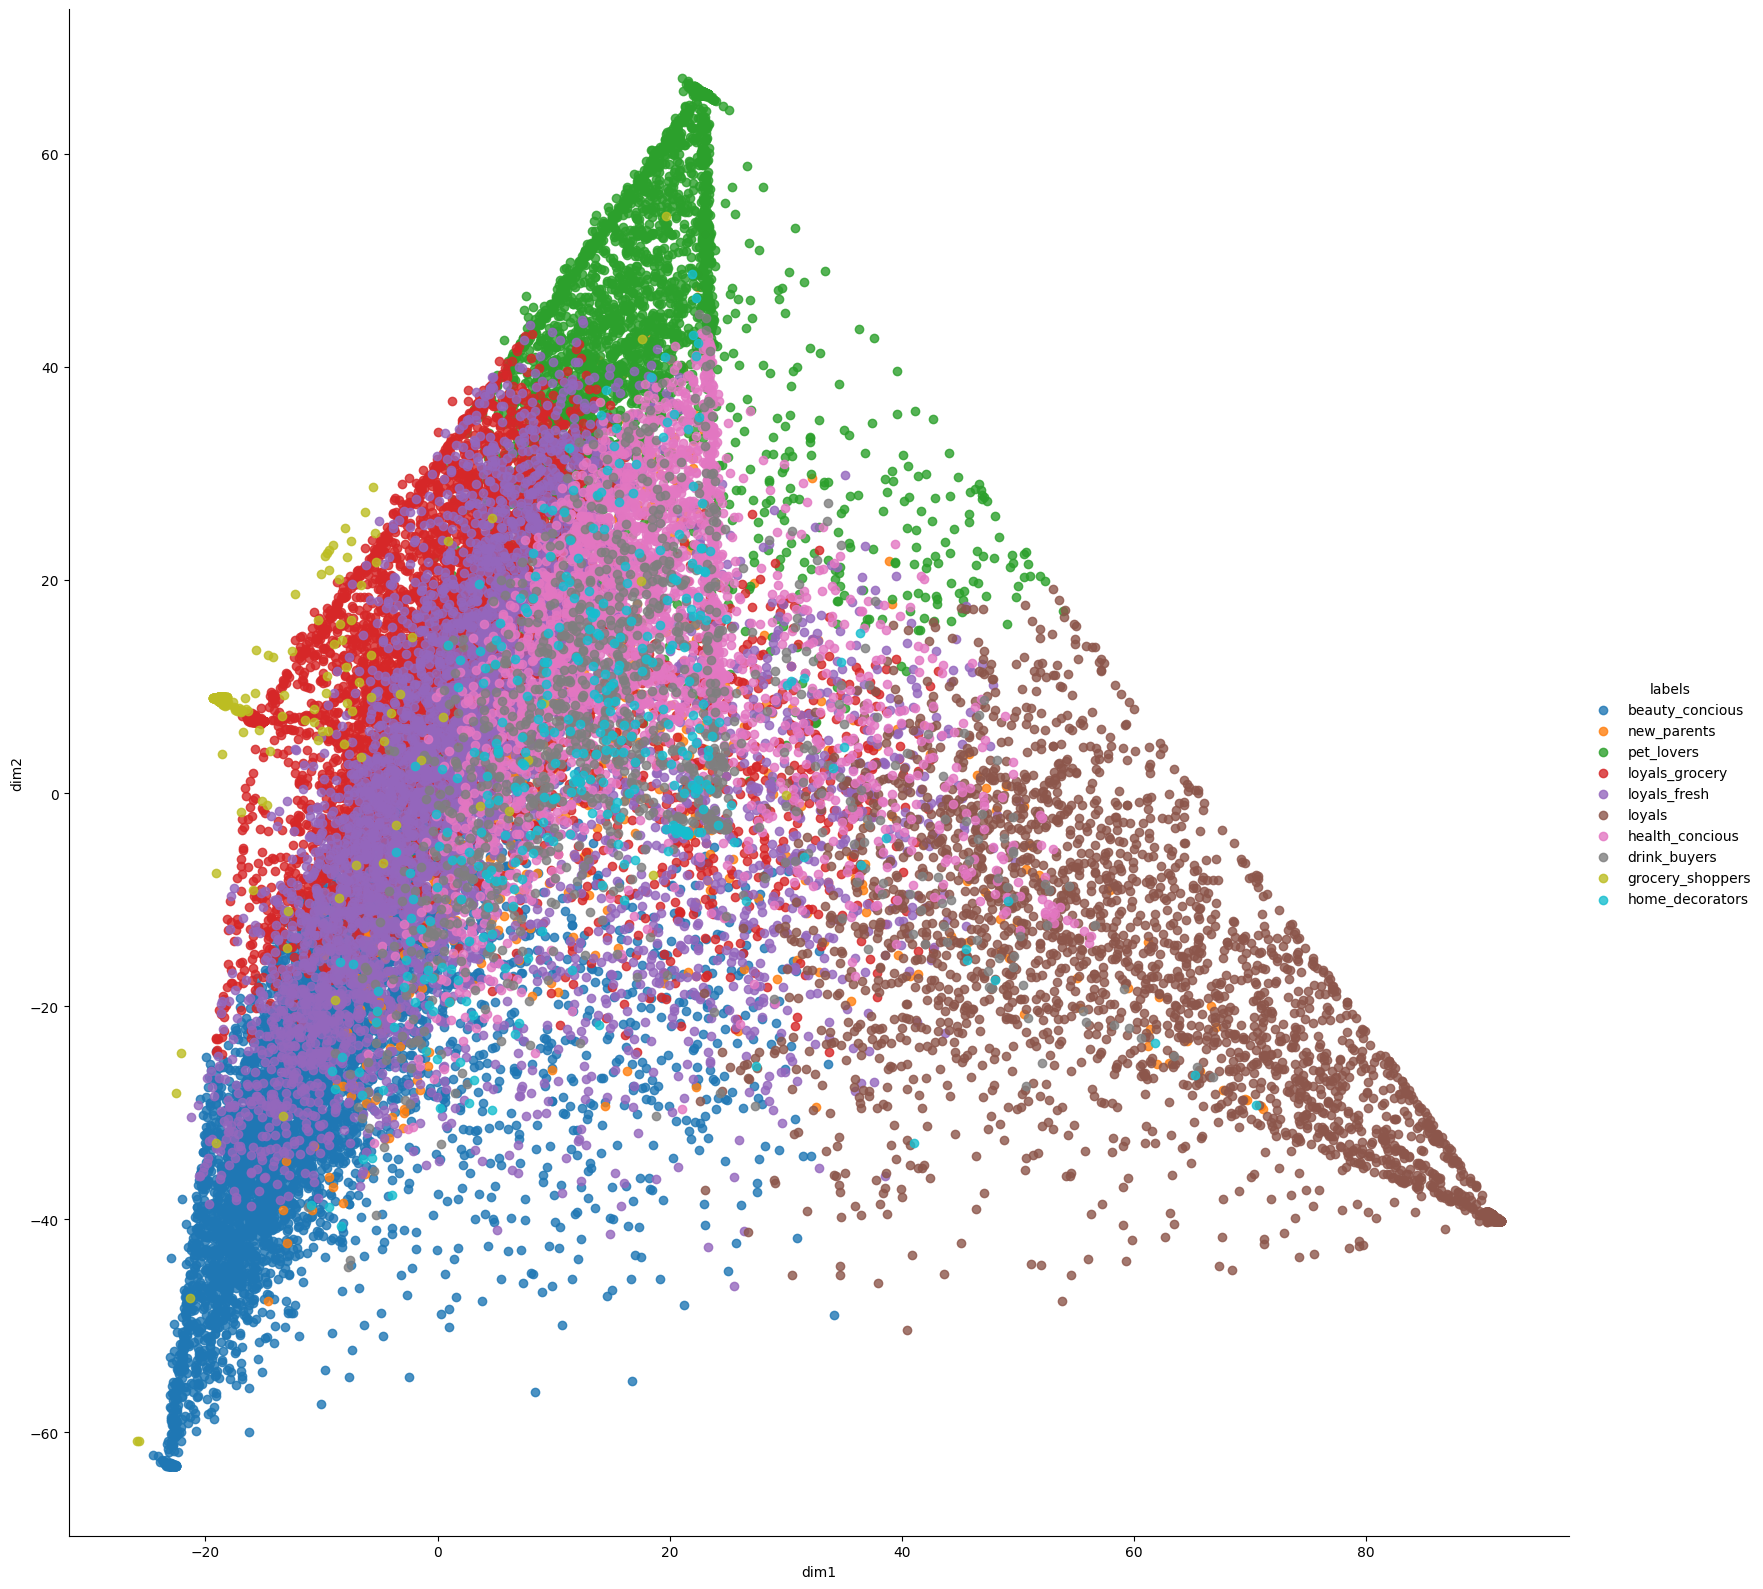

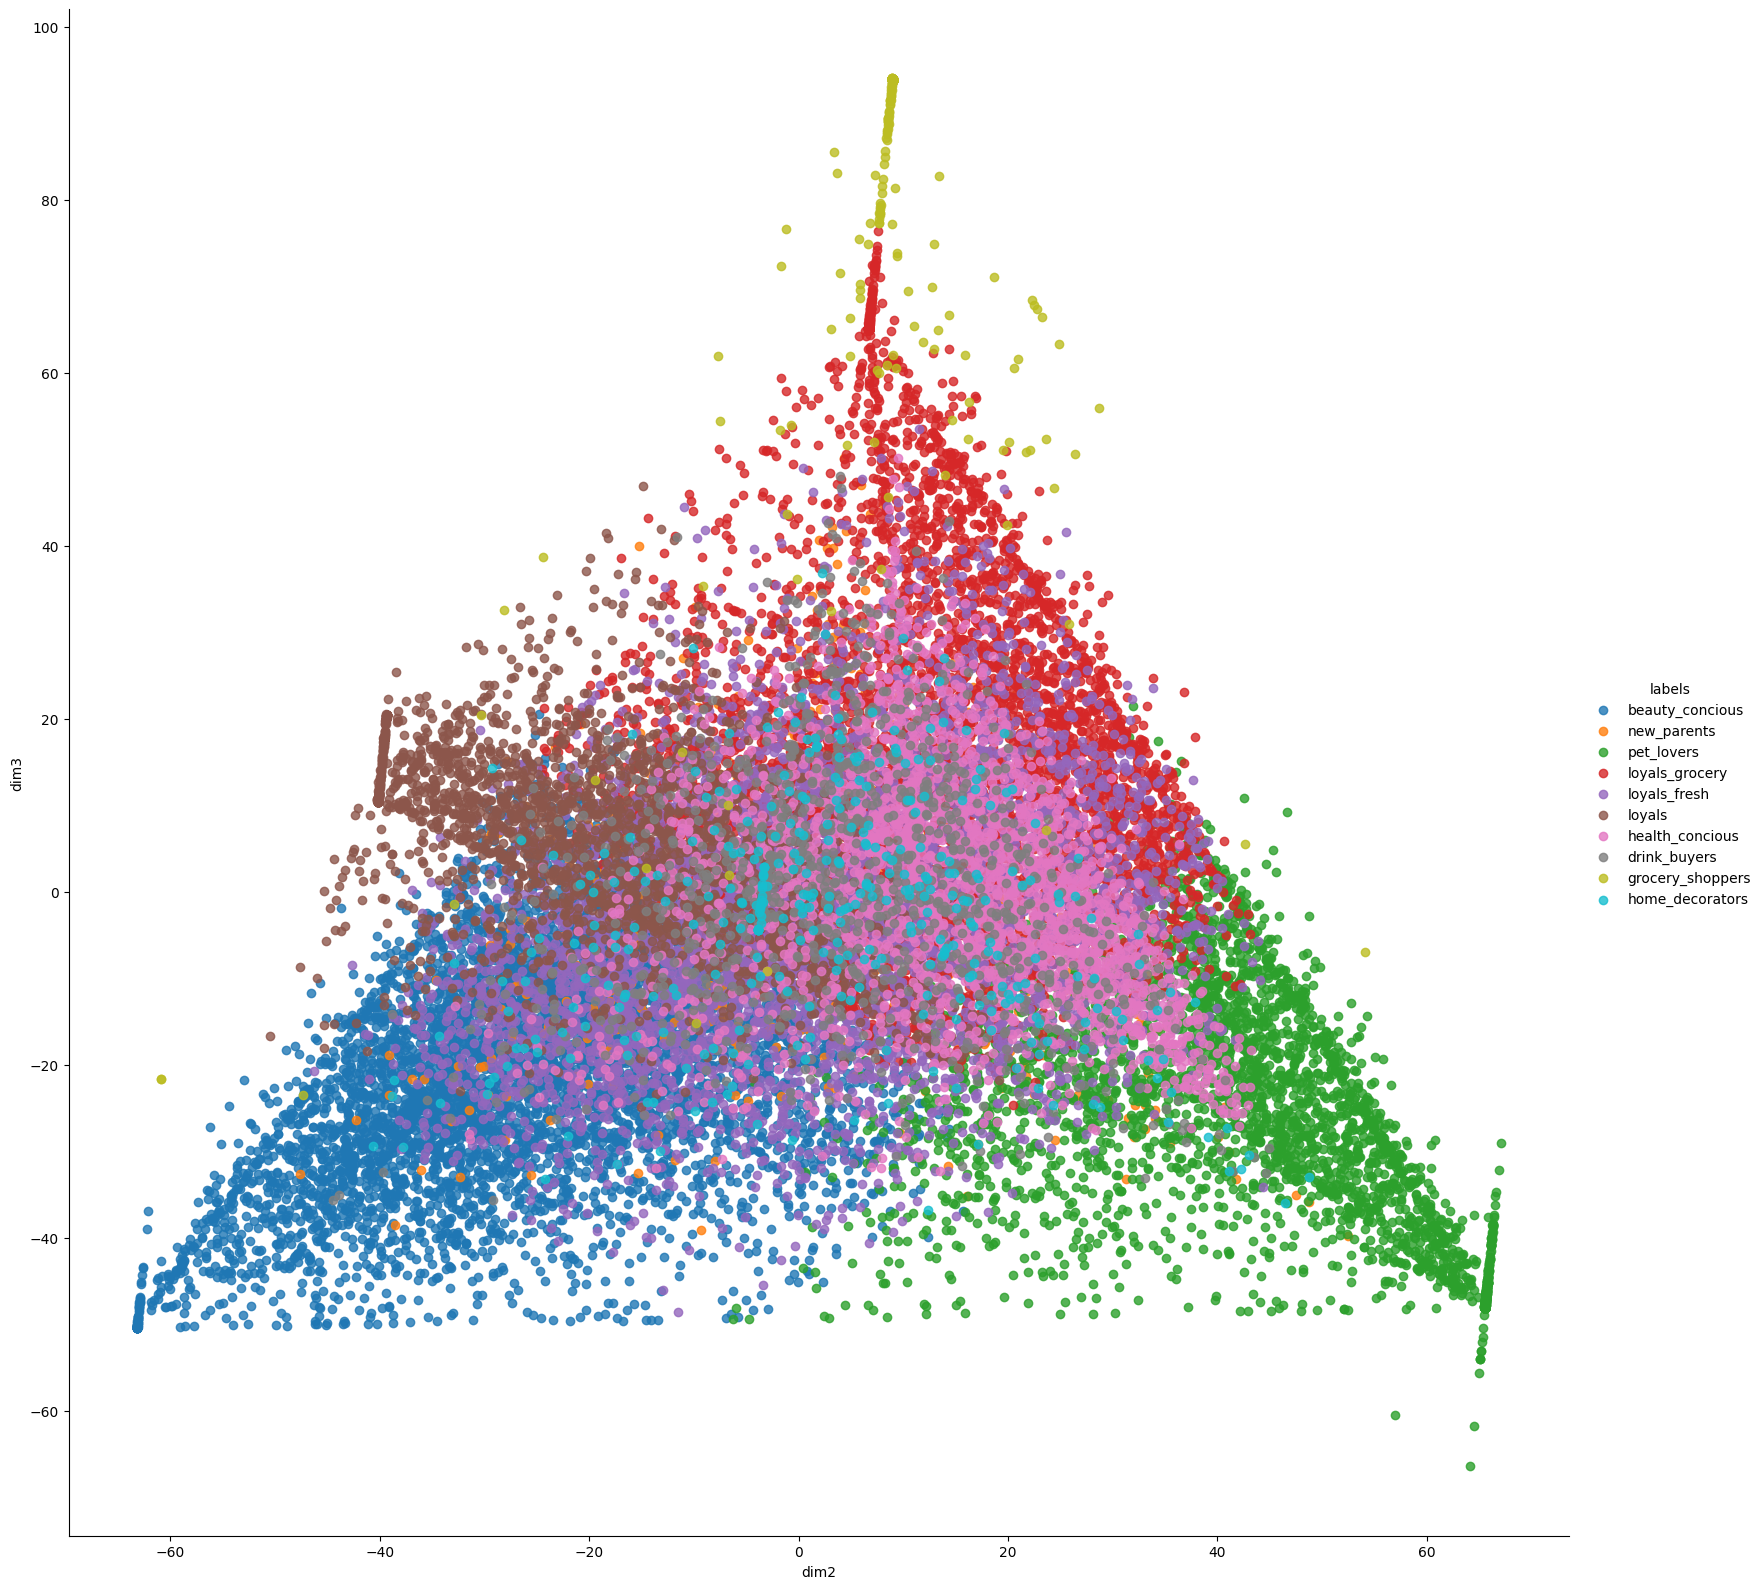

In [ ]:
pca_2d_plot_labels(pca, df, frame)

1. From the 2d plot we see that clusters are nicely separated in space.

In [ ]:
frame.to_csv('order_segmentation_0.0.csv')

In [ ]:
frame.groupby('class')['total_items'].describe()

count       mean        std  min   25%   50%   75%    max
class                                                                       
beauty_concious   6096.0  38.225558  18.484114  6.0  26.0  34.0  46.0  139.0
drink_buyers      1108.0  25.477437  13.758874  6.0  16.0  24.0  31.0  139.0
grocery_shoppers   507.0  46.575937  24.454597  6.0  27.0  46.0  63.0  135.0
health_concious   2856.0  26.847339  14.246804  6.0  17.0  25.0  33.0  133.0
home_decorators    366.0  24.724044  15.175063  6.0  15.0  21.0  30.0   98.0
loyals            2546.0  18.284760  11.175129  6.0  10.0  16.0  23.0  126.0
loyals_fresh      5050.0  42.520198  19.501291  7.0  29.0  38.0  51.0  140.0
loyals_grocery    5475.0  38.015708  18.858746  6.0  26.0  34.0  47.0  134.0
new_parents        690.0  25.371014  13.720358  6.0  16.0  23.0  32.0  113.0
pet_lovers        3407.0  23.530379  11.751046  6.0  15.0  22.0  30.0   98.0

1. The variation of total_items with class is not very sound, all classes of orders have similar number of total item counts.

In [ ]:
frame.groupby('class')['discount%'].describe()

count       mean        std    min       25%      50%  \
class                                                                      
beauty_concious   6096.0   5.268983   6.663868   0.00    1.0000    3.030   
drink_buyers      1108.0  11.584558  11.980588  -7.81    2.6875    7.850   
grocery_shoppers   507.0  93.727022  14.129857  42.08  100.0000  100.000   
health_concious   2856.0  12.647391  10.357405 -23.98    4.4275   11.030   
home_decorators    366.0   7.830929   8.474320 -18.06    1.3150    5.430   
loyals            2546.0   8.958295   9.982228 -23.89    1.0700    4.775   
loyals_fresh      5050.0   6.480598   6.934839  -8.07    1.8300    4.335   
loyals_grocery    5475.0   6.061704   7.252928 -11.99    1.4800    3.780   
new_parents        690.0   5.647609   8.216801  -5.54    0.7600    2.830   
pet_lovers        3407.0   5.592140   7.928831 -65.15    0.6550    3.480   

                       75%     max  
class                               
beauty_concious     6.8700   65.10  
drink_buyers       16.0900   61.86  
grocery_shoppers  100.0000  100.00  
health_concious    18.5400   86.09  
home_decorators    11.8425   42.42  
loyals             14.7200   53.29  
loyals_fresh        8.6600   60.02  
loyals_grocery      7.8950   51.90  
new_parents         7.1325   52.49  
pet_lovers          7.6650   66.14

1. The customers who have placed orders on grocery have been seen to enjoy a lot of discount, may be there was a stock clearance sale or a promotional sale ulabox.

In [ ]:
frame = pd.read_csv('order_segmentation_0.0.csv')

In [ ]:
frame['class'].value_counts().sort_values(ascending=False)

class
beauty_concious     6096
loyals_grocery      5475
loyals_fresh        5050
pet_lovers          3407
health_concious     2856
loyals              2546
drink_buyers        1108
new_parents          690
grocery_shoppers     507
home_decorators      366
Name: count, dtype: int64

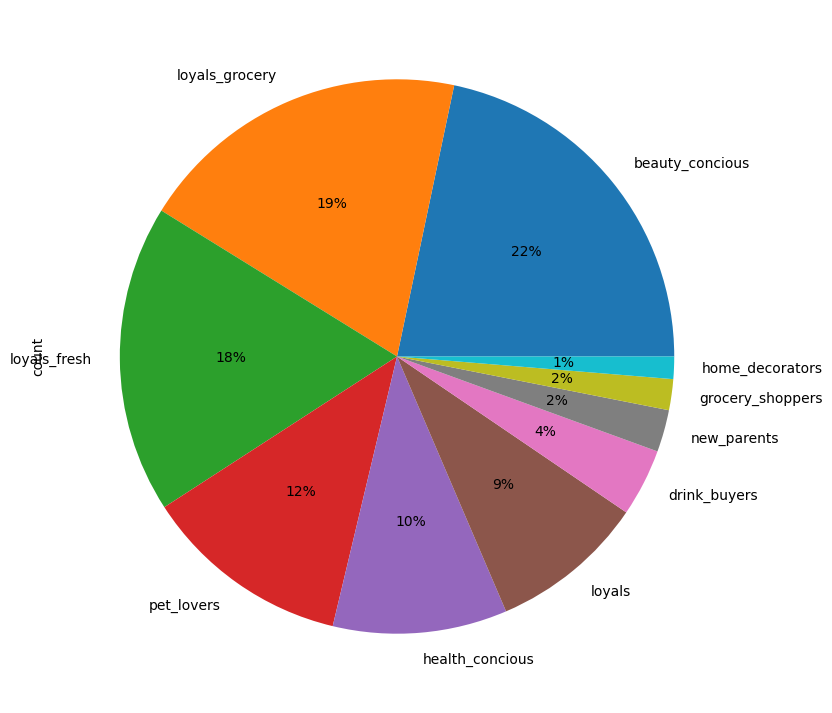

In [ ]:
plt.figure(figsize=(9,9))
frame['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(frame['class'].value_counts().sort_values(ascending=False).index))
plt.show()

1. Our hypothesised loyal costomers are placed at the top when it comes to number of orders.
2. Our next hypothesis of drink buyers being potential customers is also subtantiated.
3. Pet lovers are very less in number, ulabox should buy less pet products accordingly.
4. When seeing the large discount enjoyed by grocery shoppers in the previous data frame and the less number of grocery shoppers here. They are supposedly customers who brought only on the discount sale.
5. ulabox can actually frame their buying strategies according to these numbers.

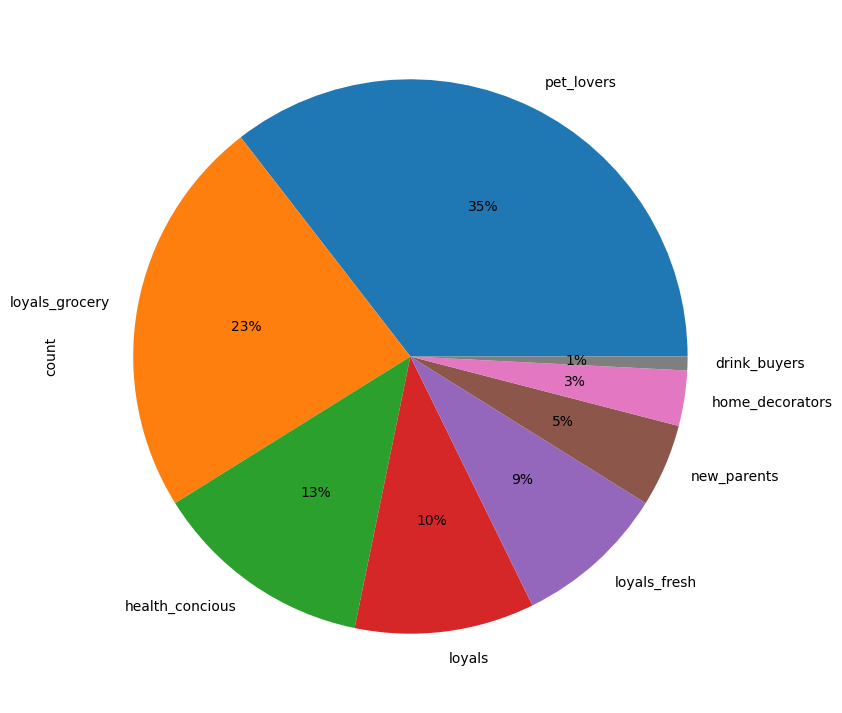

In [ ]:
plt.figure(figsize=(9,9))
frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).index)
plt.show()

In [ ]:
frame[(frame['discount%']<0).multiply(frame['class']!='drink_buyers')].describe()

Unnamed: 0      customer         order  total_items   discount%  \
count    123.000000    123.000000    123.000000   123.000000  123.000000   
mean   15765.300813   5253.918699  15765.300813    25.804878   -7.569919   
std     9291.761000   3105.569778   9291.761000    18.777672   10.602349   
min      768.000000    199.000000    768.000000     6.000000  -65.150000   
25%     7184.000000   2418.000000   7184.000000    12.000000   -8.245000   
50%    17343.000000   5833.000000  17343.000000    21.000000   -4.530000   
75%    24273.500000   8011.000000  24273.500000    34.000000   -1.335000   
max    29734.000000  10113.000000  29734.000000    86.000000   -0.030000   

          weekday        hour       Food%      Fresh%     Drinks%       Home%  \
count  123.000000  123.000000  123.000000  123.000000  123.000000  123.000000   
mean     3.650407   14.260163   20.078780    0.260244   47.536829   15.466423   
std      2.115453    6.006605   20.690417    2.886245   27.875696   17.414469   
min      1.000000    0.000000    0.000000    0.000000    4.470000    0.000000   
25%      2.000000   11.000000    0.000000    0.000000   25.540000    0.000000   
50%      3.000000   14.000000   15.930000    0.000000   41.420000    9.500000   
75%      6.000000   19.000000   34.090000    0.000000   67.520000   27.730000   
max      7.000000   23.000000   78.570000   32.010000  100.000000   74.670000   

          Beauty%     Health%       Baby%       Pets%      labels  
count  123.000000  123.000000  123.000000  123.000000  123.000000  
mean     2.666911    1.917398   10.177805    1.895772    5.430894  
std      5.351481    6.865918   24.394274    8.327910    2.496165  
min      0.000000    0.000000    0.000000    0.000000    2.000000  
25%      0.000000    0.000000    0.000000    0.000000    3.000000  
50%      0.000000    0.000000    0.000000    0.000000    6.000000  
75%      3.280000    0.000000    0.000000    0.000000    8.000000  
max     24.970000   52.570000   86.330000   67.420000    8.000000

1. From the table we can say, even the people in other clusters who had to pay a negative discount have brought a lot drinks.

In [ ]:
frame[frame['discount%']<0].shape[0]

124

-> Only 124 among 30k had to pay an extra charge, that's not a pain killer problem.